# Heart Disease Prediction using Machine Learning


## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Here we will be experimenting with 5 supervised algorithms 
1. Logistic Regression
2. KNeighborsClassifier
3. DecisionTreeClassifier
4. RandomForestClassifier
5. SVM






In [2]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

### Database information 

we use heart database from kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/?fbclid=IwAR2qLqJUN5aVuQD8XdSYKgQswWCdHcsHVmcNyJgU_5P5ZzPxFGEEjiTA568) ,which has 1025 rows & 14columns.


Attribute Information:

+ age
+ sex
+ chest pain type (4 values)
+ resting blood pressure
+ serum cholestoral in mg/dl
+ fasting blood sugar > 120 mg/dl
+ resting electrocardiographic results (values 0,1,2)
+ maximum heart rate achieved
+ exercise induced angina
+ oldpeak = ST depression induced by exercise relative to rest
+ the slope of the peak exercise ST segment
+ number of major vessels (0-3) colored by flourosopy
+ thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
   The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
 

## Check Out The Data

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [4]:
# print first 5 rows of the dataset
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
# print last 5 rows of the dataset
heart_data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [6]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [7]:
heart_data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
heart_data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [10]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# statistical measures about the data
heart_data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [12]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

## Exploratory Data Analysis(EDA)

  Let's create some simple plots to check out the data


<Axes: >

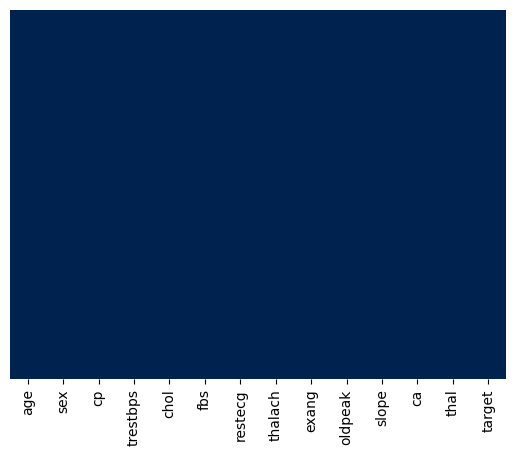

In [13]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

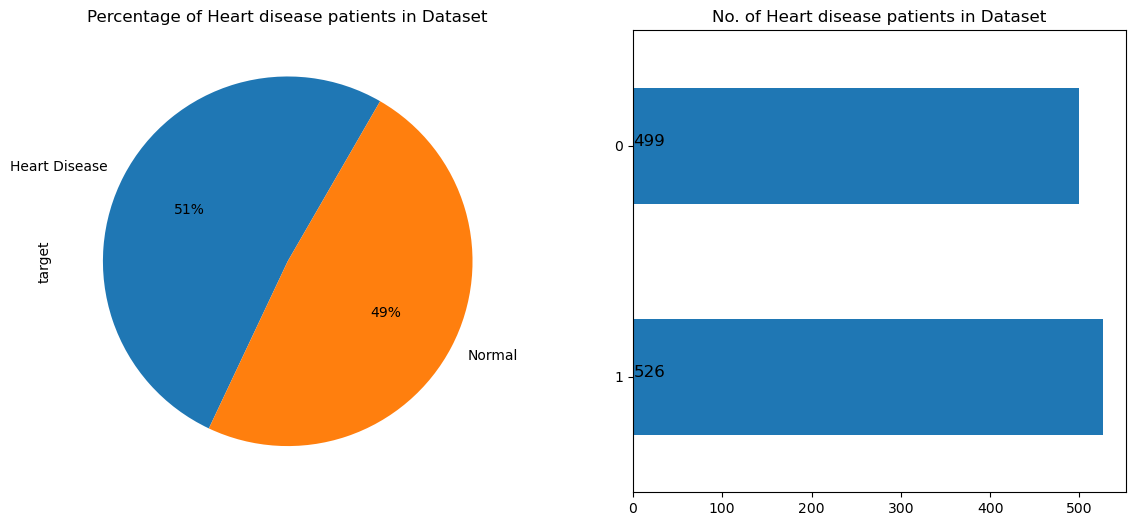

In [14]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = heart_data['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = heart_data["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(heart_data["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

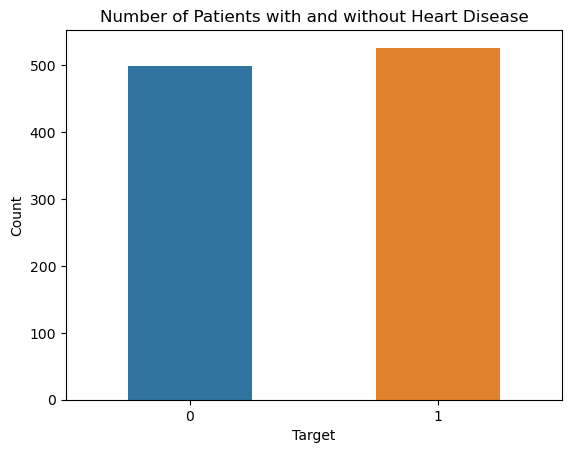

1    526
0    499
Name: target, dtype: int64


In [15]:
# Get the number of patients with and without heart disease
target_counts = heart_data['target'].value_counts()

# Get the number of patients with and without heart disease
target_counts = heart_data['target'].value_counts()

# Create a bar chart of the number of patients with and without heart disease
sns.barplot(x=target_counts.index, y=target_counts.values,width=0.5)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Number of Patients with and without Heart Disease')
plt.show()

print(target_counts)


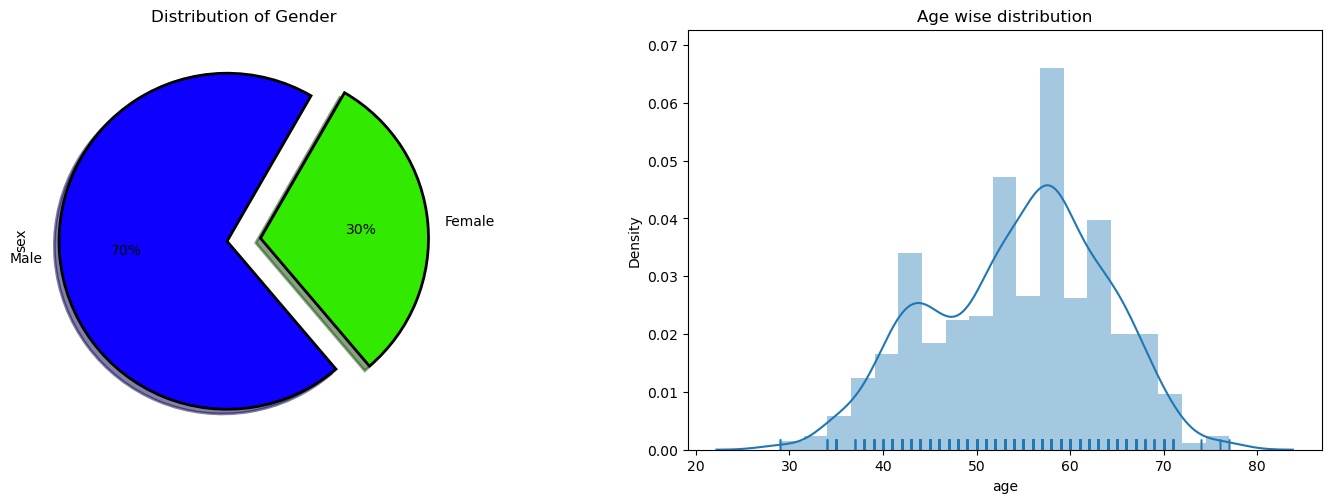

In [16]:
plt.figure(figsize=(18,12))
plt.subplot(221)
heart_data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(heart_data['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

<Axes: xlabel='sex', ylabel='target'>

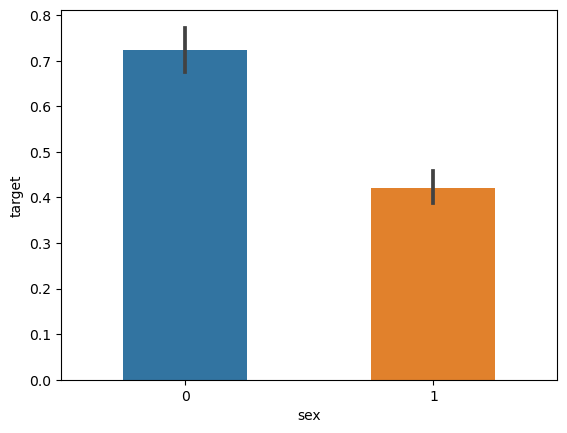

In [17]:
sns.barplot(x=heart_data["sex"],y=heart_data["target"],width=0.5)


**We notice, that females are more likely to have heart problems than males**

### Heart disease frequency for ages

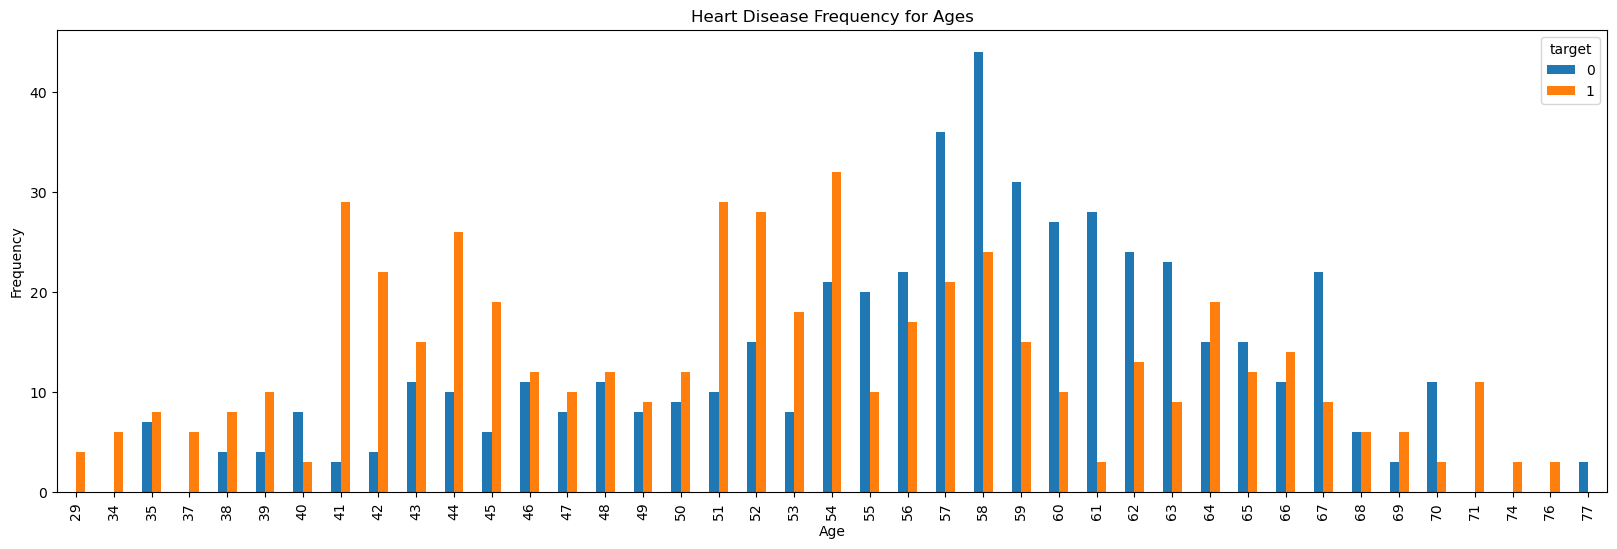

In [18]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()
     

### Heart Disease Frequency for male and female

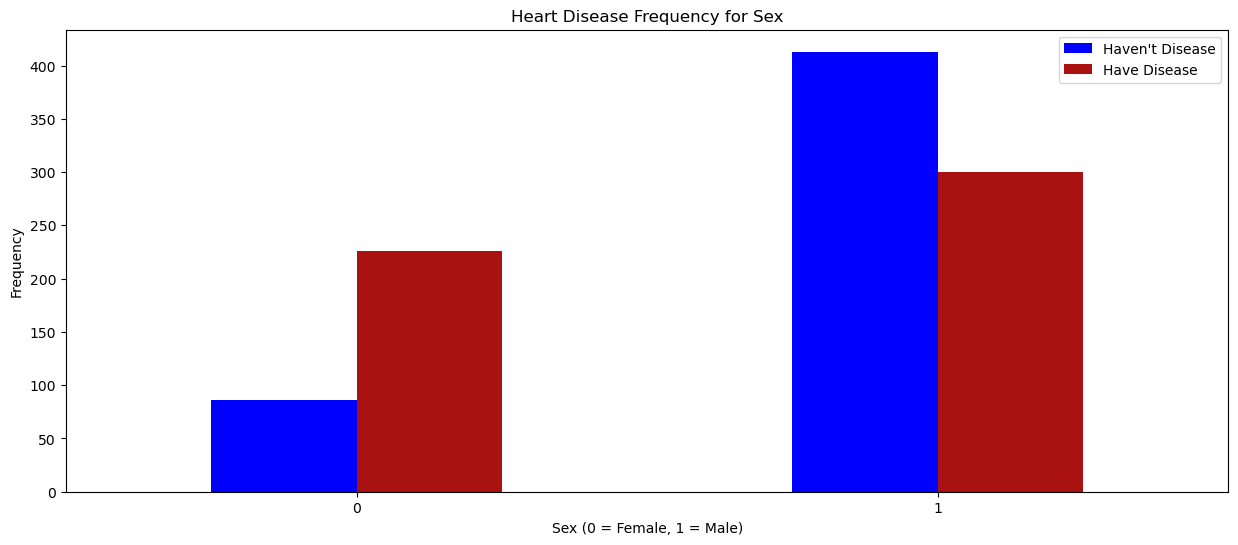

In [19]:
pd.crosstab(heart_data.sex,heart_data.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [20]:
# df = pd.DataFrame({'target': [1, 0, 1, 0], 'sex': ['male', 'female', 'male', 'female']})

# # Create a crosstab of the data
# crosstab = pd.crosstab(df['sex'], df['target'])


# # Rename the column `disease` to `target`
# crosstab = crosstab.rename(columns={'disease': 'target'})

# # Create a pie chart of the crosstab
# plt.figure(figsize=(10, 10))
# crosstab.plot.pie(y='target', autopct="%1.0f%%", colors=['blue', '#AA1111'], startangle=60,labels=["Haven't Disease", "Have Disease"], wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[0.1, 0.1], shadow=True)
# plt.title("Heart Disease Frequency for Sex")
# plt.show()

### Thalassemia vs Cholesterol 

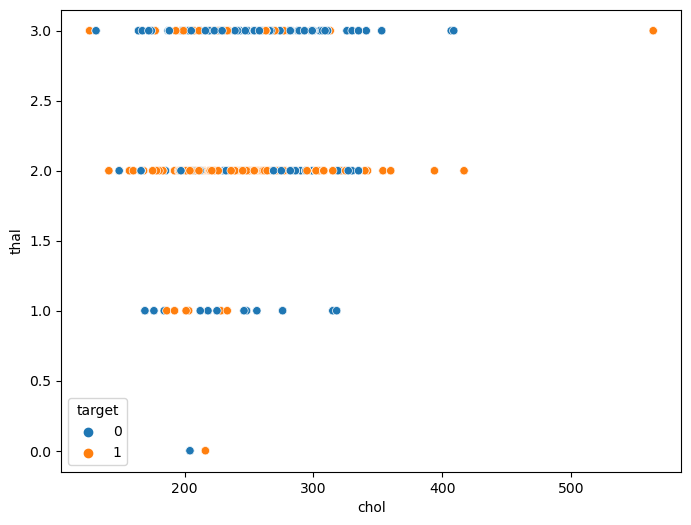

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thal',data=heart_data,hue='target')
plt.show()

### Thalassemia vs resting blood pressure

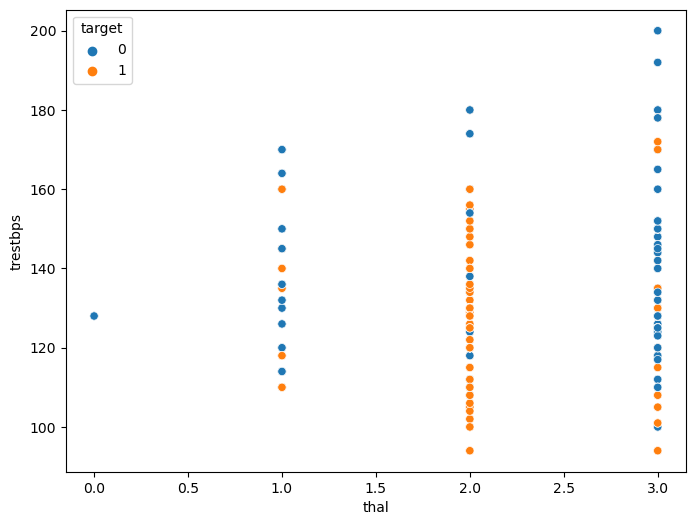

In [22]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='thal',y='trestbps',data=heart_data,hue='target')
plt.show()

### Age vs Maximum heart disease rate

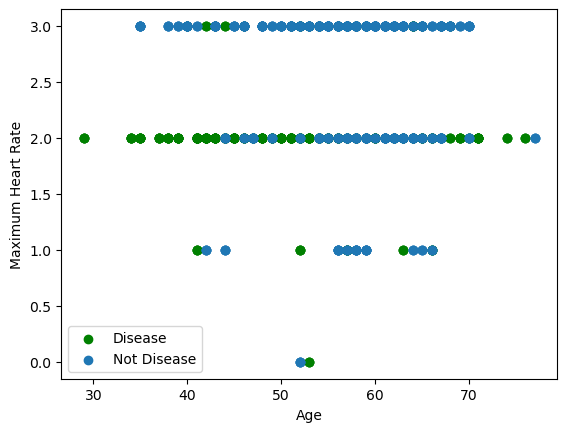

In [23]:
plt.scatter(x=heart_data.age[heart_data.target==1], y=heart_data.thal[(heart_data.target==1)], c="green")
plt.scatter(x=heart_data.age[heart_data.target==0], y=heart_data.thal[(heart_data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Fasting Blood sugar Data

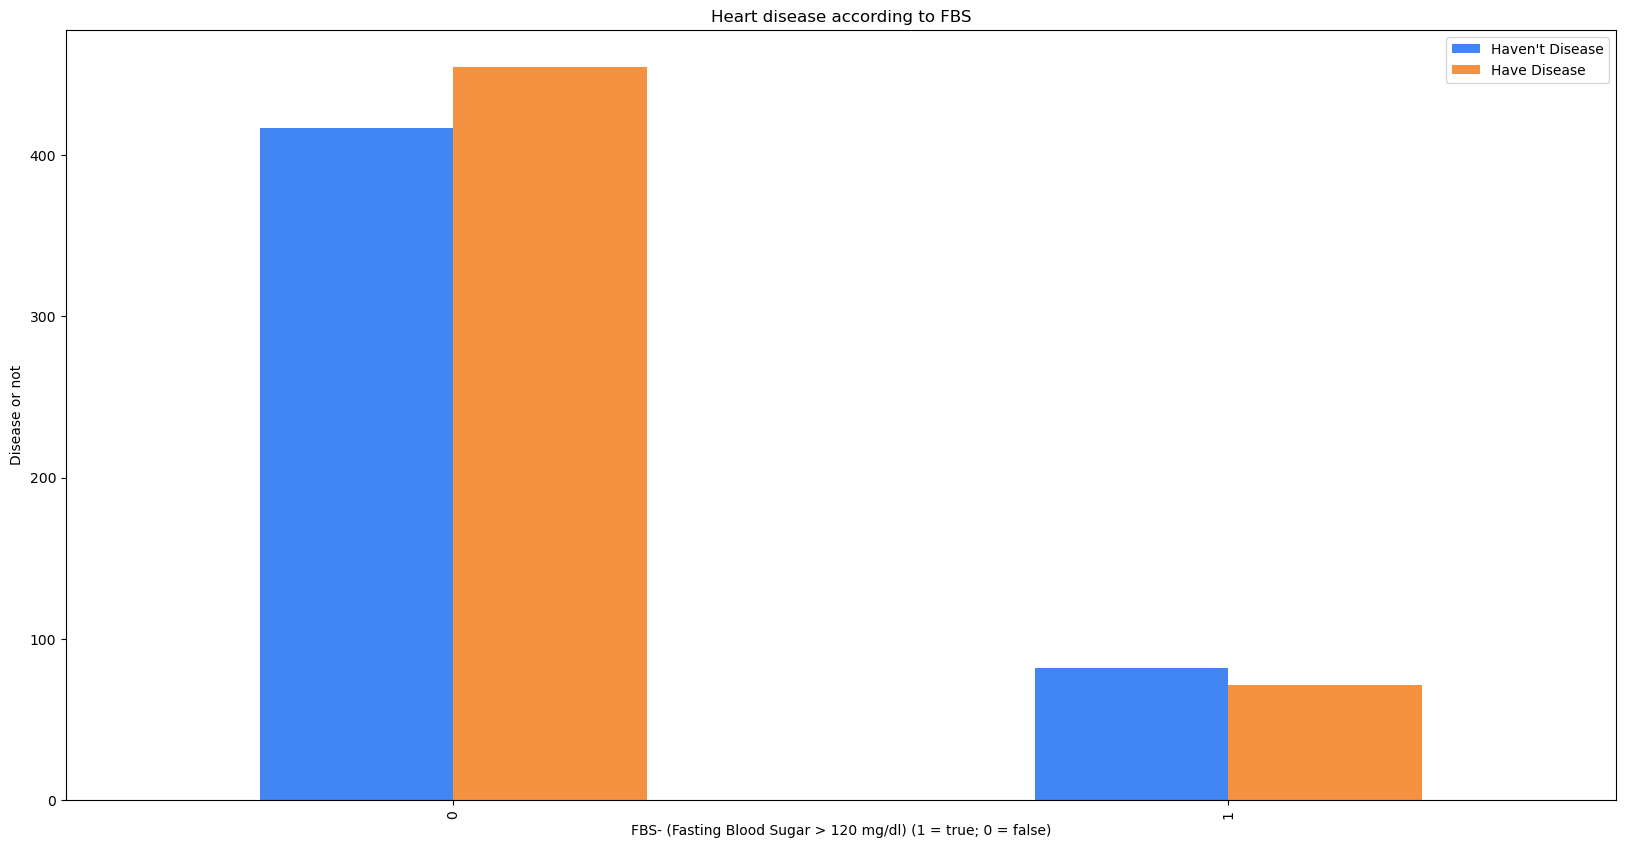

In [24]:
pd.crosstab(heart_data.fbs,heart_data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()
     

In [25]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in heart_data.columns:
    if (len(heart_data[i].unique())) > 5:
        colNUM.append(i)
        print('NUM data:  {}\t{}'.format(len(heart_data[i].unique()),i))
    else:
        colCAT.append(i)
        print('CAT data:  {}\t{}'.format(len(heart_data[i].unique()),i))

NUM data:  41	age
CAT data:  2	sex
CAT data:  4	cp
NUM data:  49	trestbps
NUM data:  152	chol
CAT data:  2	fbs
CAT data:  3	restecg
NUM data:  91	thalach
CAT data:  2	exang
NUM data:  40	oldpeak
CAT data:  3	slope
CAT data:  5	ca
CAT data:  4	thal
CAT data:  2	target


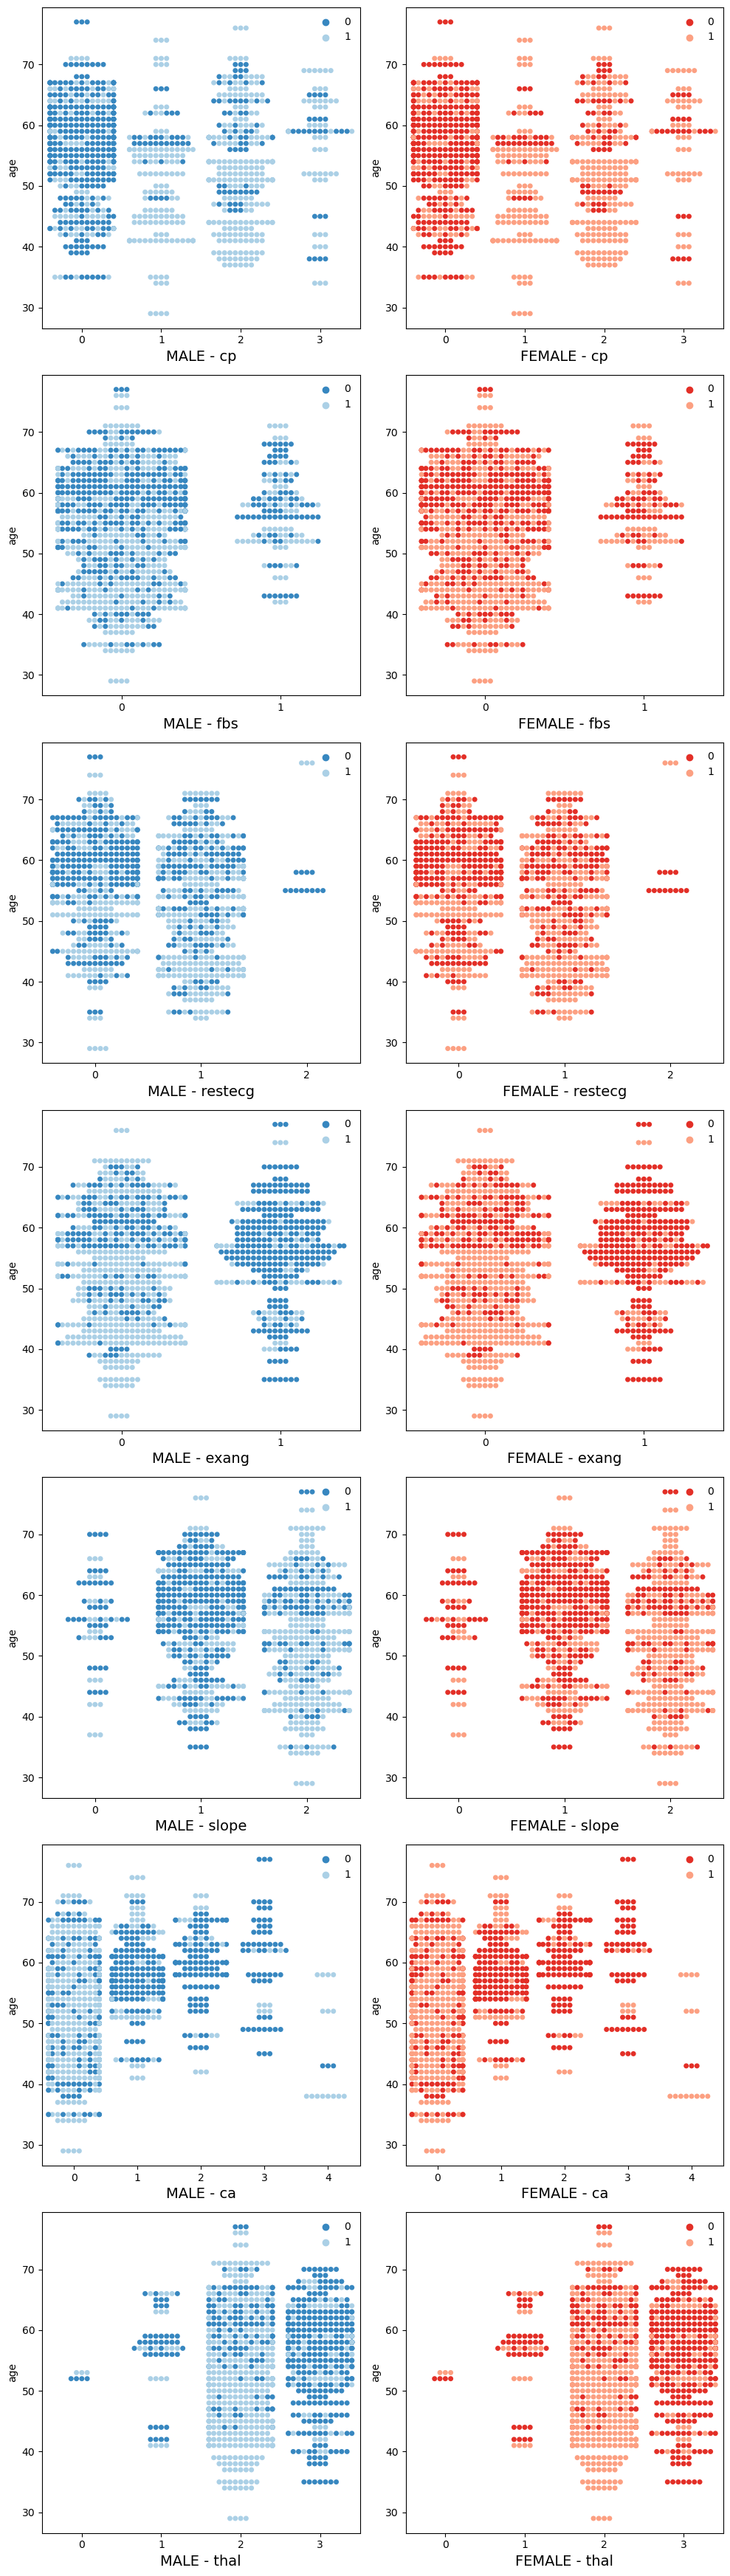

In [26]:
# --- CAT MALE/FEMALE swarmplots ---
a = len(heart_data[colCAT].columns.drop(['sex','target']))
       # number of rows (CAT columns minus sex & output)
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,a*5))

for i in heart_data[colCAT].columns.drop(['sex','target']):
    #  swarmplot - MALE
    fig.add_subplot(a,b,c)
    sns.swarmplot(data = heart_data[heart_data['sex'] == 'male'], x = heart_data[i], y = heart_data.age, hue = heart_data.target, palette = 'Blues_r')
    plt.xlabel('MALE - {}'.format(i), fontsize = 14)
    plt.legend(loc='upper right', frameon=False)
    c = c + 1
    
    #  swarmplot - FEMALE
    fig.add_subplot(a,b,c)
    sns.swarmplot(data = heart_data[heart_data['sex'] == 'female'], x = heart_data[i], y = heart_data.age, hue = heart_data.target, palette = 'Reds_r')
    plt.xlabel('FEMALE - {}'.format(i), fontsize = 14)
    plt.legend(loc='upper right', frameon=False)
    c = c + 1

plt.tight_layout()
plt.show()

#### OBSERVATIONS:

- **chest pain type** - typical angina accounts for most cases with no heart disease.  Populations with anything other than typical angina have a higher chance of having heart disease.

- **fasting blood sugar** - is not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same, with most patients having higher blood sugar levels.

- **resting electrocardiographic** - is not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same.  

- **exercise induced angina** - population with no angina are more likely to have heart disease. 

- **slope peak exercise ST** - populations with down-sloping and flat sloping have a higher incidence of heart disease.

- **number of major vessels** - patients with no vessels colored by fluoroscopy have a much higher incidence of heart disease.

- **thalium stress test** - patients with fixed defect have a significantly higher incidence of heart disease.

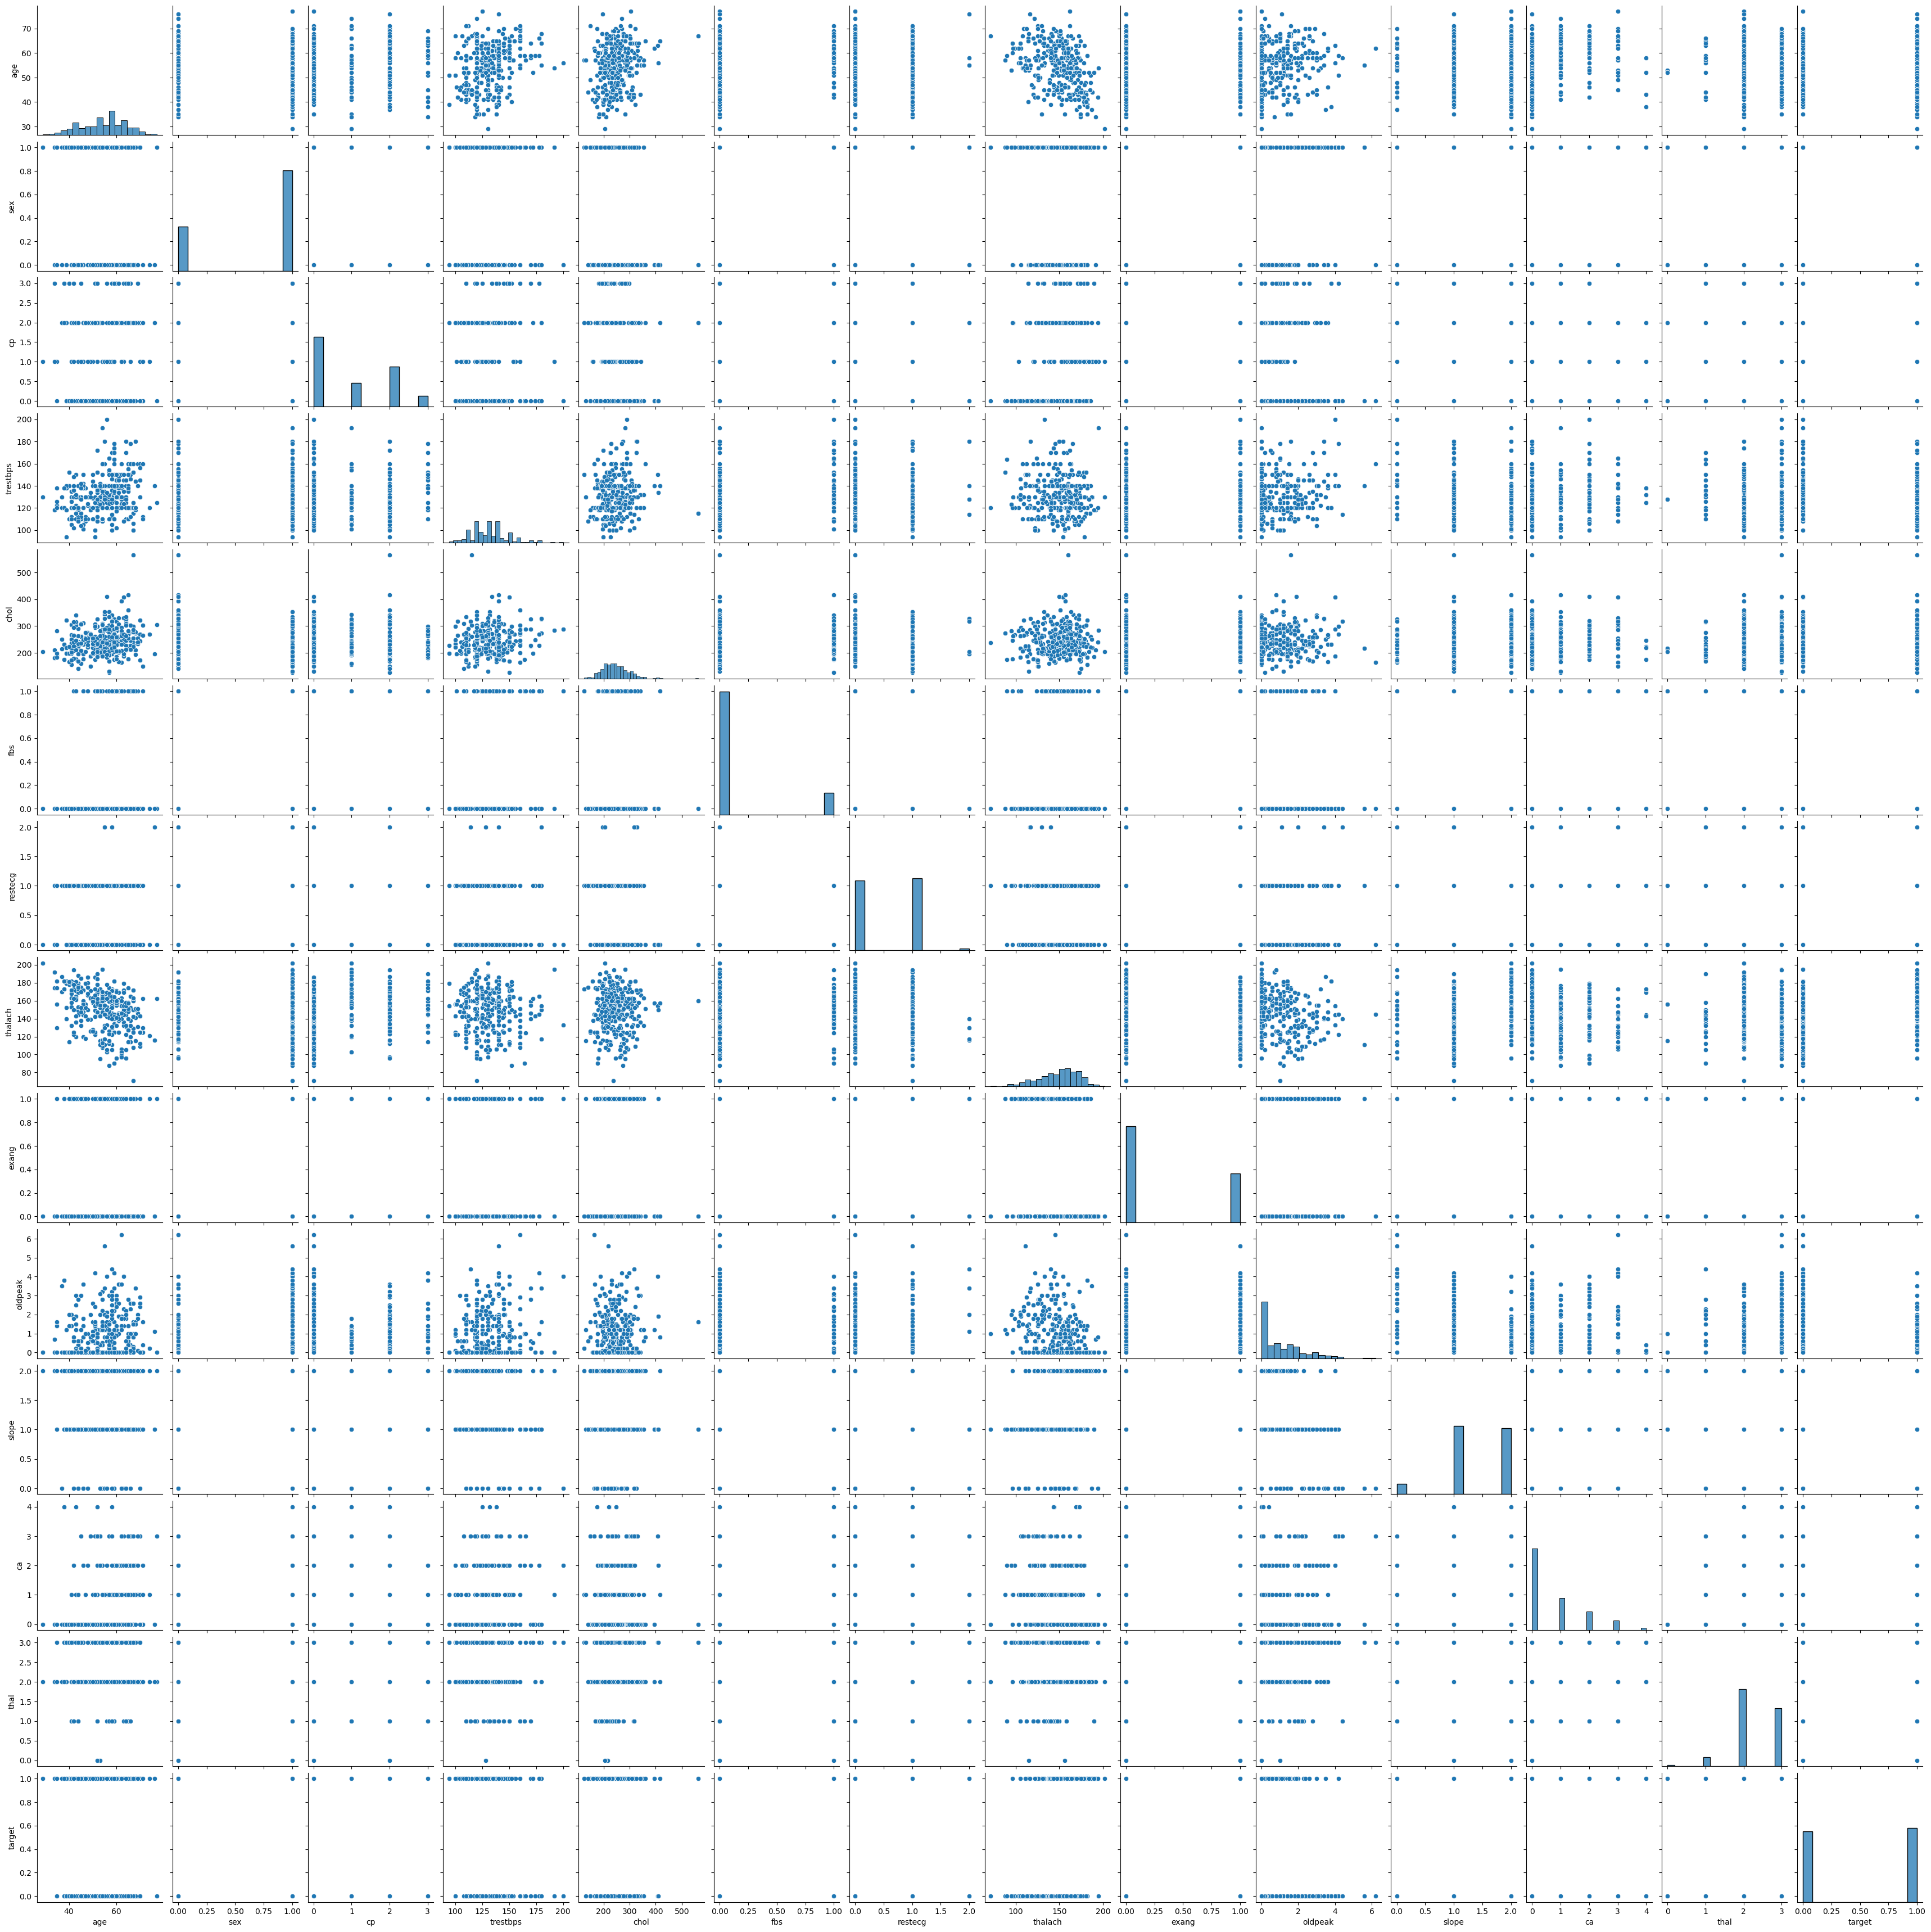

In [27]:
sns.pairplot(heart_data)

<Axes: xlabel='target', ylabel='Density'>

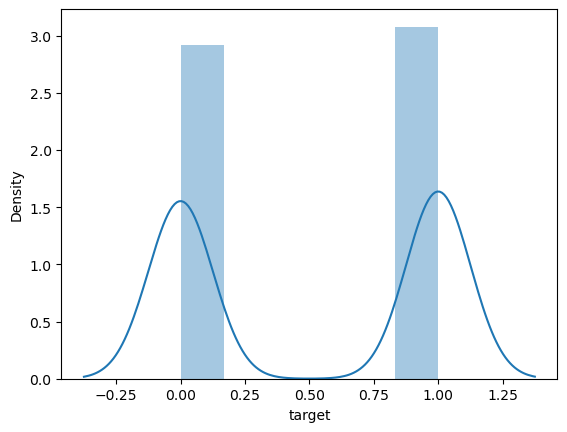

In [28]:
sns.distplot(heart_data['target'])

<Axes: >

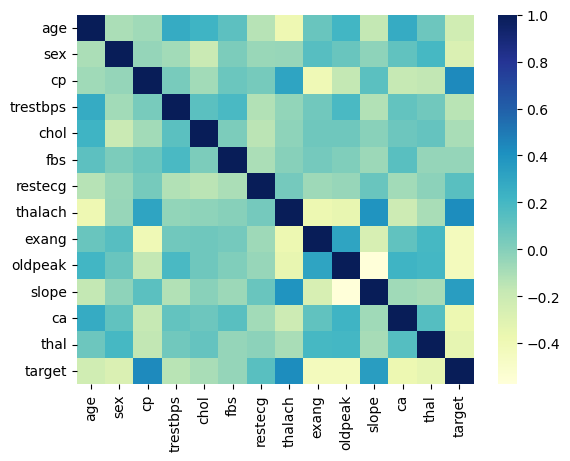

In [29]:
sns.heatmap(heart_data.corr(),cmap='YlGnBu')

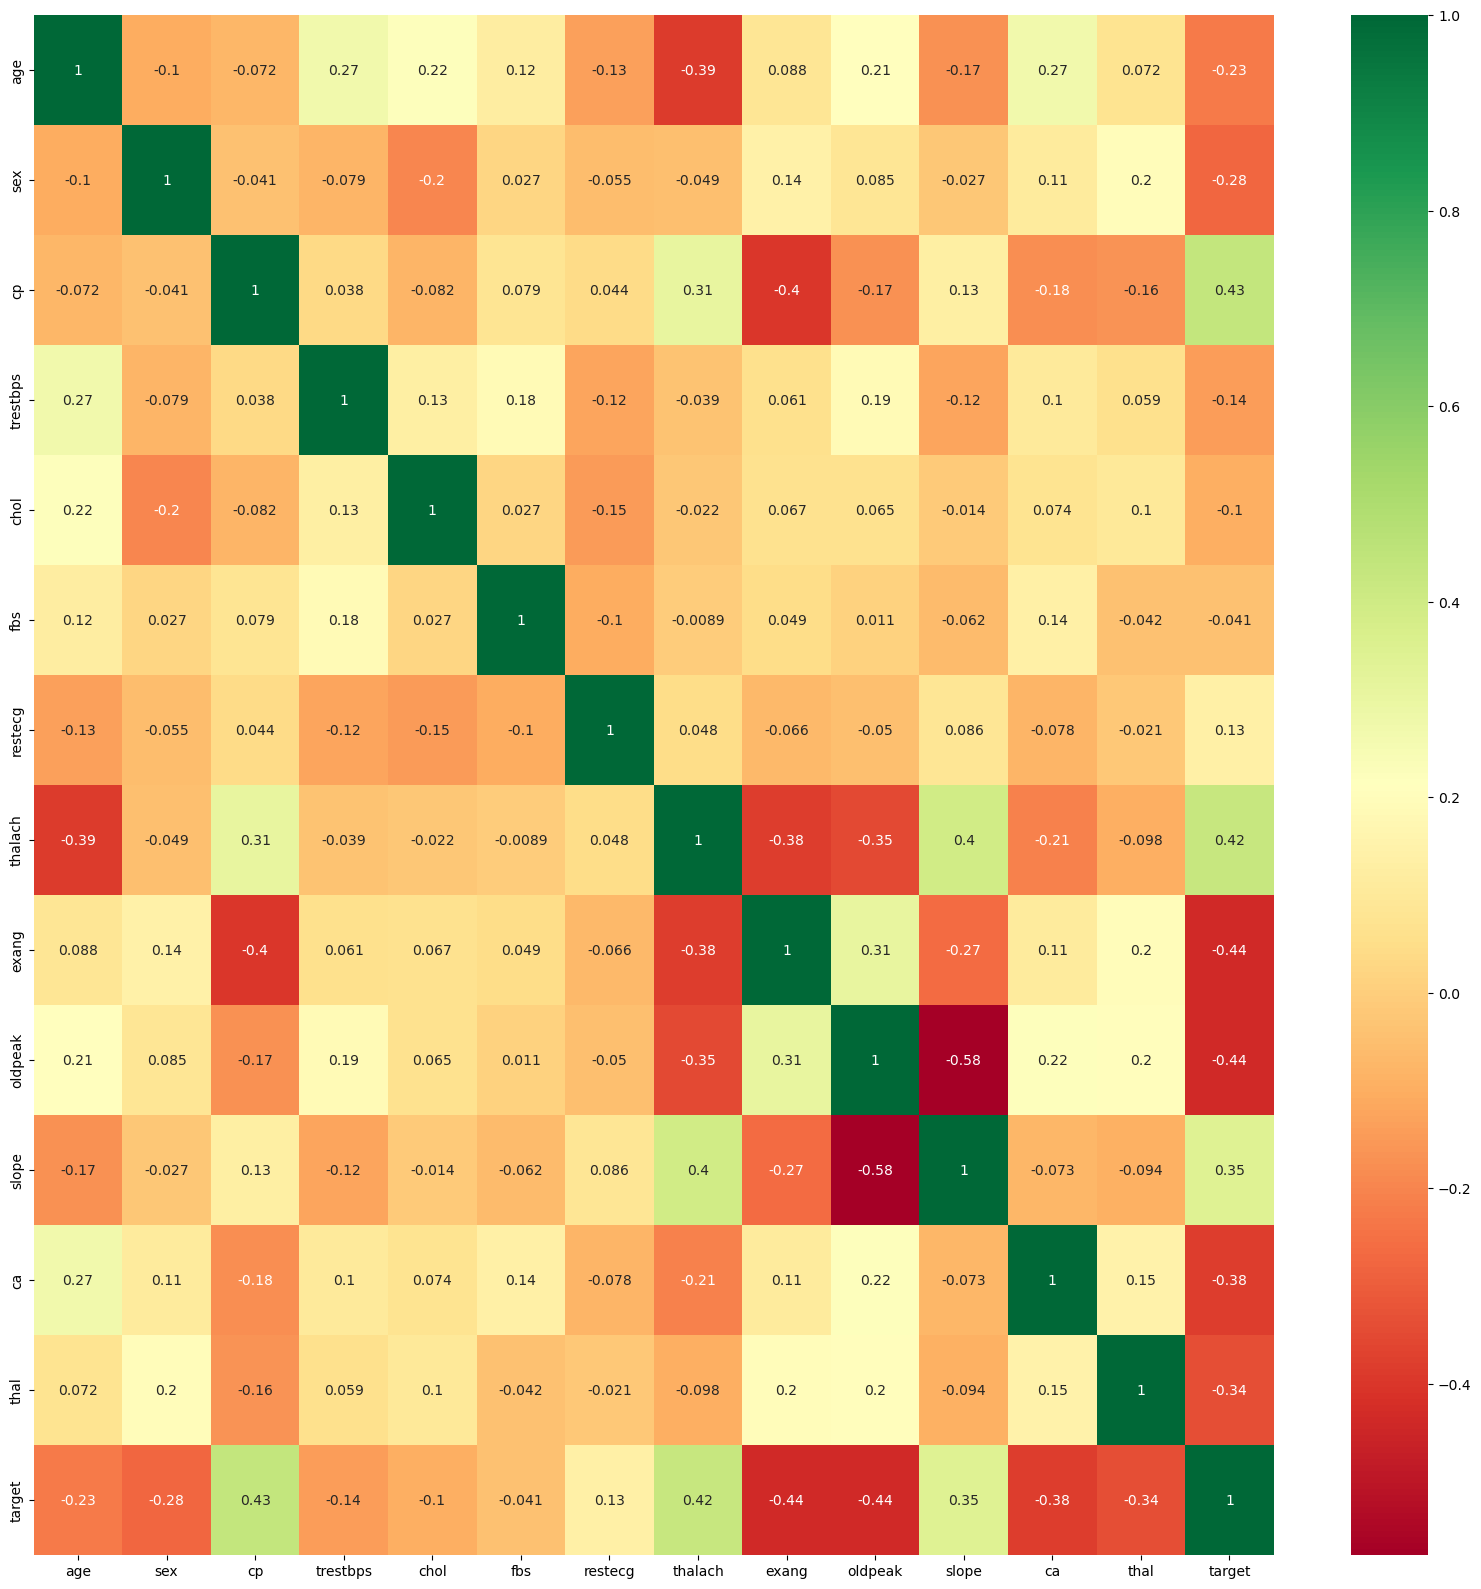

In [30]:
#get correlations of each features in dataset
corrmat = heart_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

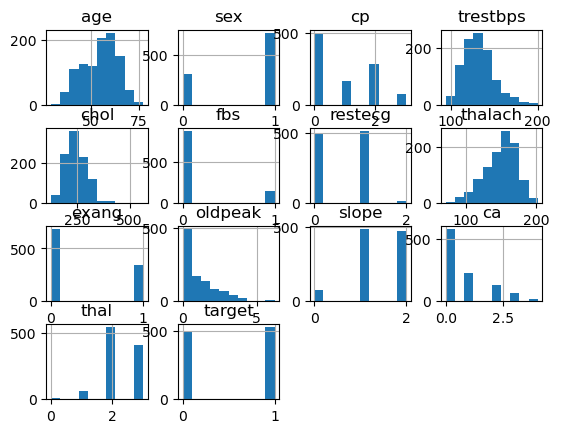

In [31]:
heart_data.hist()

<Axes: xlabel='target', ylabel='count'>

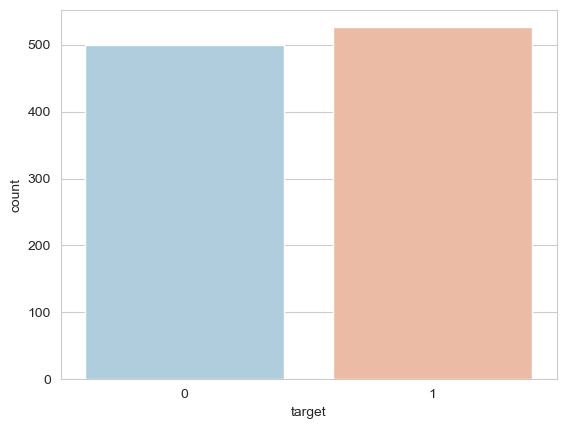

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_data,palette='RdBu_r')

## Data Processing & Standarized The Variable

In [33]:
dataset = heart_data

In [34]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [35]:
dataset.head()

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target  
0 -0.060888      2   2     3       0  
1  1.727137      0   0     3       0  
2  1.301417      0   0     3       0  
3 -0.912329      2   1     3       0  
4  0.705408      1   3     2       0

## Splitting the Features and Target



In [36]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [37]:
print(X)

           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1    -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2     1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3     0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4     0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   
...        ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020  0.503520    1   1  0.479107 -0.484803    0        1  0.647366      1   
1021  0.613800    1   0 -0.377636  0.232705    0        0 -0.352873      1   
1022 -0.819834    1   0 -1.234378  0.562371    0        0 -1.353113      1   
1023 -0.488996    0   0 -1.234378  0.155137    0        0  0.429923      0   
1024 -0.047877    1   0 -0.663216 -1.124743    0        1 -1.570556      0   

       oldpeak  slope  ca  thal  
0    -0.060888      2   2    

In [38]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


## Splitting the Data into Training data & Test Data


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (717, 13) (308, 13)


## Model Training

### Using *`Logistic`* Regression

In [41]:
model = LogisticRegression()

In [42]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

Logistic Model Evaluation

In [43]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8772663877266388


In [45]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7987012987012987


In [47]:
model.score(X_test,Y_test)

0.7987012987012987

In [48]:
LS=model.score(X_test,Y_test)*100
LS

79.87012987012987

In [49]:

lr_pred = model.predict(X_test)

lr_f1_score = f1_score(Y_test, lr_pred )

# Print the F1 score
print('F1 score for logistic regression:', lr_f1_score)

F1 score for logistic regression: 0.8132530120481927


Building a Predictive System

In [50]:
# Outout will be 0
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


### Using KNN

Choosing K Value

In [51]:
error_rate = []
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

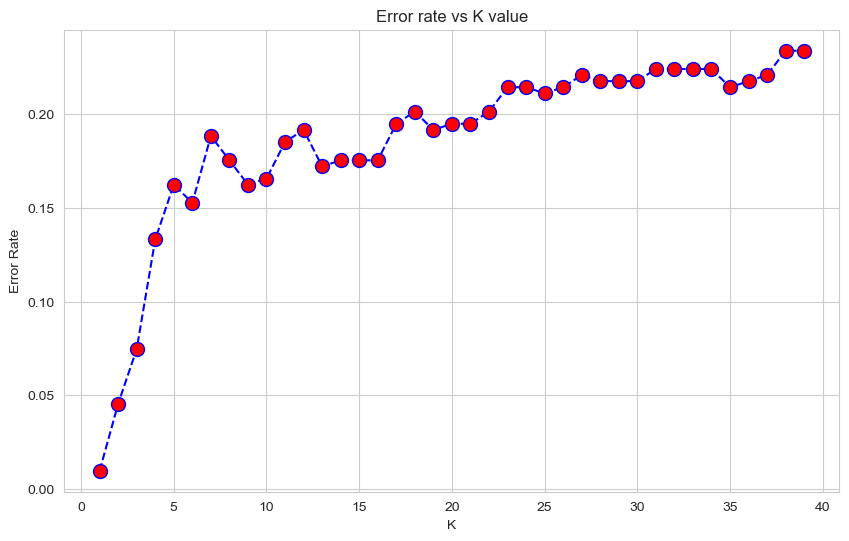

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [53]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [54]:
pred=knn.predict(X_test)
print('WITH K=9')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=9


[[118  32]
 [ 18 140]]


              precision    recall  f1-score   support

           0       0.87      0.79      0.83       150
           1       0.81      0.89      0.85       158

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



In [55]:
knn_pred=knn.predict(X_test)

knn_f1_score = f1_score(Y_test, knn_pred)

# Print the F1 score
print('F1 score for knn:', knn_f1_score)

F1 score for knn: 0.8484848484848485


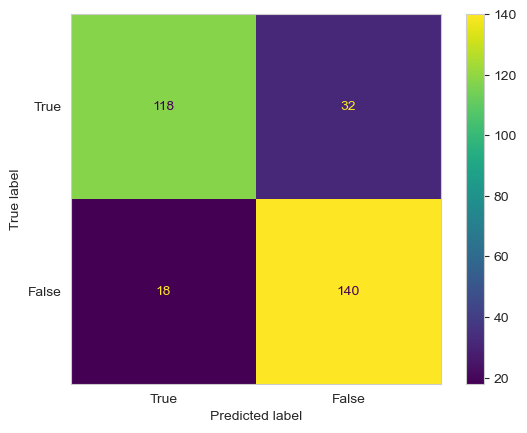

In [56]:
conf_matrix = confusion_matrix(Y_test,pred)
vis=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=[True,False])
vis.plot()
plt.grid(False)
plt.show()

In [57]:
# build confusion metrics
CM=pd.crosstab(Y_test,pred)
CM

col_0     0    1
target          
0       118   32
1        18  140

In [58]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [59]:
#check accuracy of model
KNNS=((TP+TN)*100)/(TP+TN+FP+FN)
KNNS

83.76623376623377

In [60]:
# Outout will be 0
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [61]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

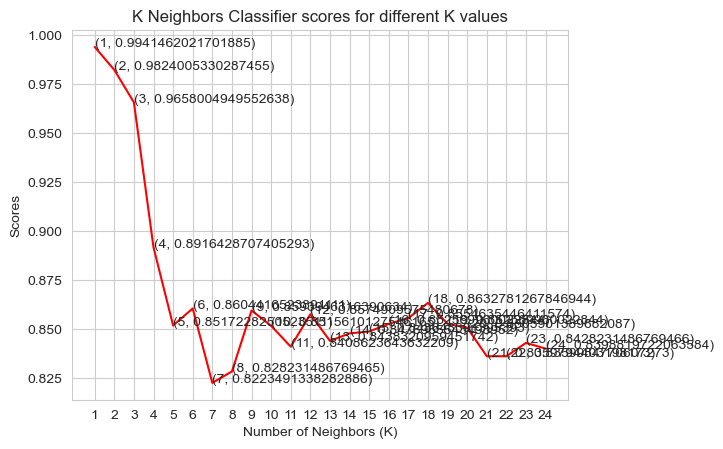

In [62]:
plt.plot([k for k in range(1, 25)], knn_scores, color = 'red')
for i in range(1,25):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 25)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [63]:
score.mean()

0.8398819722063584

### Using Decision Tree

In [64]:
#APPLY THE DECISION TREE
dst = tree.DecisionTreeClassifier(random_state=0)
dst.fit(X_train,Y_train)

#Prediction (Calculation / Learning knowledge from Training Examples)
Y_train_pred = dst.predict(X_train)


In [65]:
#Prediction for new data (Test set)
Y_test_pred = dst.predict(X_test)

In [66]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

[Text(0.508578431372549, 0.95, 'cp <= 0.5\ngini = 0.5\nsamples = 717\nvalue = [349, 368]\nclass = heart disease'),
 Text(0.30637254901960786, 0.85, 'ca <= 0.5\ngini = 0.358\nsamples = 343\nvalue = [263, 80]\nclass = No heart disease'),
 Text(0.20098039215686275, 0.75, 'thal <= 2.5\ngini = 0.499\nsamples = 147\nvalue = [77, 70]\nclass = No heart disease'),
 Text(0.10784313725490197, 0.65, 'exang <= 0.5\ngini = 0.392\nsamples = 86\nvalue = [23, 63]\nclass = heart disease'),
 Text(0.0392156862745098, 0.55, 'thalach <= -2.288\ngini = 0.203\nsamples = 61\nvalue = [7, 54]\nclass = heart disease'),
 Text(0.0196078431372549, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No heart disease'),
 Text(0.058823529411764705, 0.45, 'chol <= 1.367\ngini = 0.1\nsamples = 57\nvalue = [3, 54]\nclass = heart disease'),
 Text(0.0392156862745098, 0.35, 'gini = 0.0\nsamples = 52\nvalue = [0, 52]\nclass = heart disease'),
 Text(0.0784313725490196, 0.35, 'age <= 0.779\ngini = 0.48\nsamples = 5\nvalue =

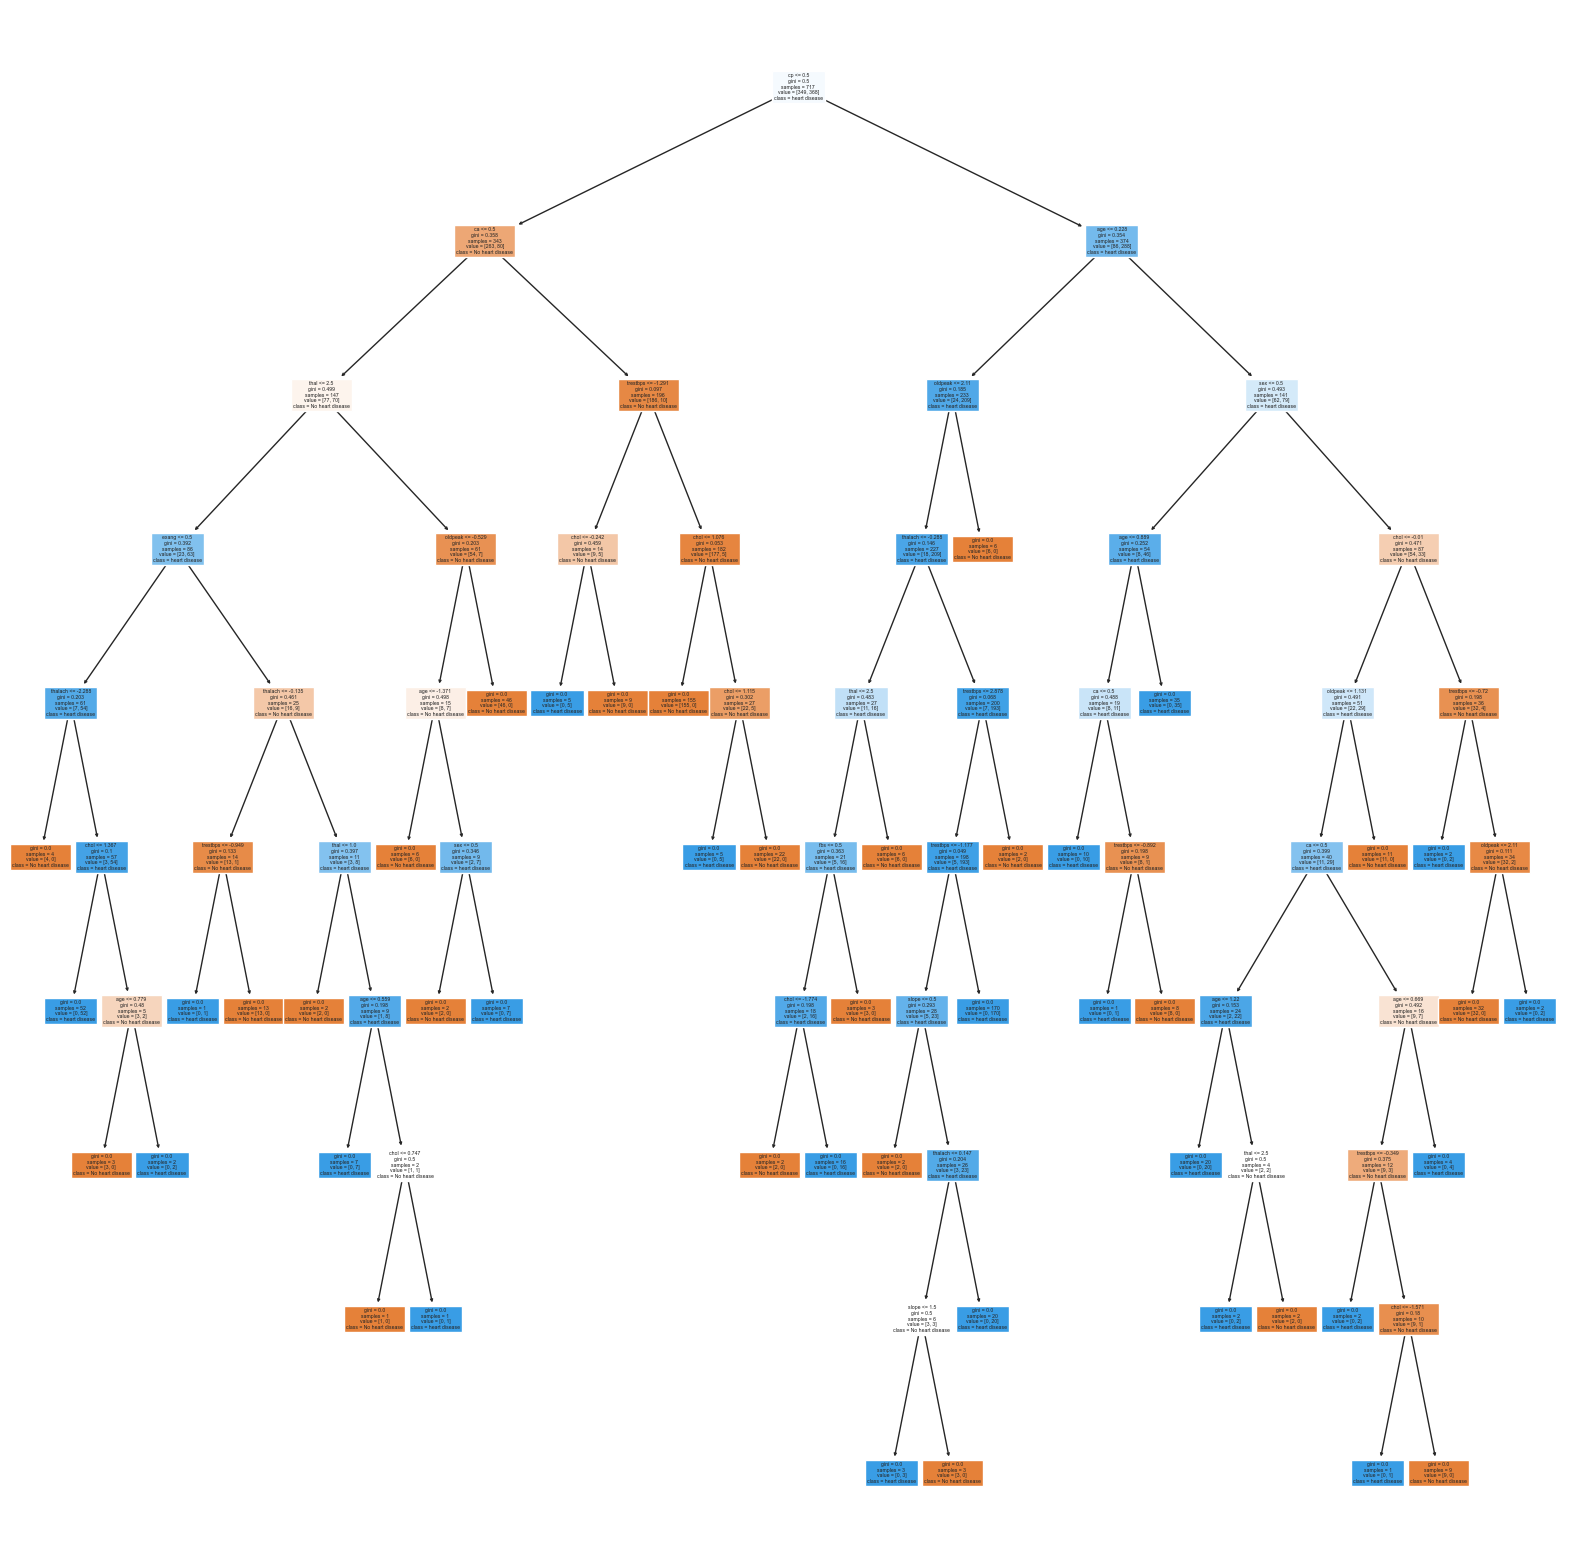

In [67]:
#VISUALIZING THE DECISION TREE
plt.figure(figsize=(20,20))
features=list(heart_data.columns)
classes=['No heart disease', 'heart disease']
tree.plot_tree(dst,feature_names=features,class_names=classes,filled=True)

In [68]:
print(f'Training accuracy {accuracy_score(Y_train_pred,Y_train)}')
print(f'Test accuracy {accuracy_score(Y_test_pred,Y_test)}')

Training accuracy 1.0
Test accuracy 0.9707792207792207


In [69]:
dst_pred=dst.predict(X_test)
dst_f1_score=f1_score(Y_test,dst_pred)
print('F1 score for decision tree:',dst_f1_score)

F1 score for decision tree: 0.9712460063897763


In [70]:
DCTS=accuracy_score(Y_test_pred,Y_test)*100
DCTS

97.07792207792207

In [71]:
# Outout will be 0
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dst.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


**Let's our model is overfitted, for this we apply pruning.**

In [72]:
# POST PRUNING - COST COMPLEXITY PRUNING APPROCH
path=dst.cost_complexity_pruning_path(X_train,Y_train)
#path variable gives two values: ccp_alphas and impurities

ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha provodes list of values : ",ccp_alphas)
print("----------------------------------------------------------------------------------------------------------------")
print("Impurities in Dcision Tree : ",impurities)

ccp alpha provodes list of values :  [0.         0.00123973 0.00247947 0.00251046 0.00255695 0.00259016
 0.00334728 0.0033987  0.0036065  0.00376569 0.00433907 0.00458049
 0.00470711 0.00495893 0.00495893 0.00524759 0.00566735 0.00607469
 0.0061483  0.00661771 0.00687138 0.00739082 0.00755647 0.00826489
 0.0092027  0.00935737 0.01248564 0.01364607 0.01382206 0.02075318
 0.02777995 0.03799472 0.04235605 0.14381708]
----------------------------------------------------------------------------------------------------------------
Impurities in Dcision Tree :  [0.         0.00247947 0.00495893 0.00746939 0.01258329 0.01517345
 0.01852073 0.03211554 0.03572203 0.03948772 0.04382679 0.04840728
 0.05311439 0.05807333 0.06799119 0.07323879 0.07890614 0.08498084
 0.09112914 0.11759998 0.12447135 0.13186218 0.13941865 0.15594843
 0.16515113 0.1745085  0.19947977 0.21312584 0.22694791 0.24770109
 0.27548104 0.31347576 0.35583182 0.49964889]


In [73]:
All_dst = []  # will store all the model here
for ccp_alpha in ccp_alphas:
  dst = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  dst.fit(X_train, Y_train)
  All_dst.append(dst)

# Print the number of nodes in the last decision tree and the corresponding ccp_alpha.
print("Last node in Decision Tree is {} and ccp_alpha for last node is {}".format(All_dst[-1].tree_.node_count, ccp_alphas[-1] ))

Last node in Decision Tree is 1 and ccp_alpha for last node is 0.14381707534229132


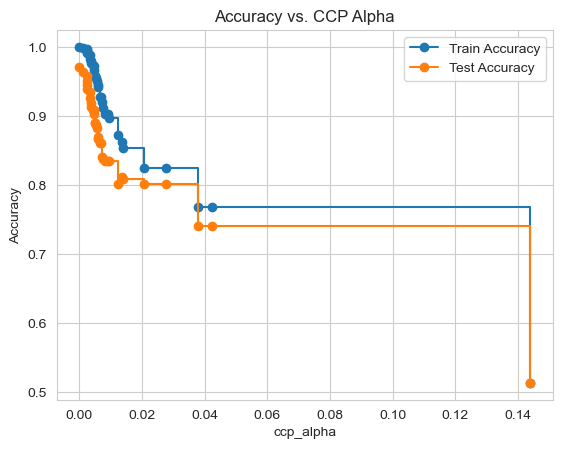

In [74]:
#VISUALIZING THE ACCURACY FOR TRAIN AND TEST SET

train_acc = []
test_acc = []

for dst in All_dst:
  train_acc.append(dst.score(X_train, Y_train))
  test_acc.append(dst.score(X_test, Y_test))

plt.plot(ccp_alphas, train_acc, marker='o', drawstyle="steps-post", label='Train Accuracy')
plt.plot(ccp_alphas, test_acc, marker='o', drawstyle="steps-post", label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. CCP Alpha')
plt.show()

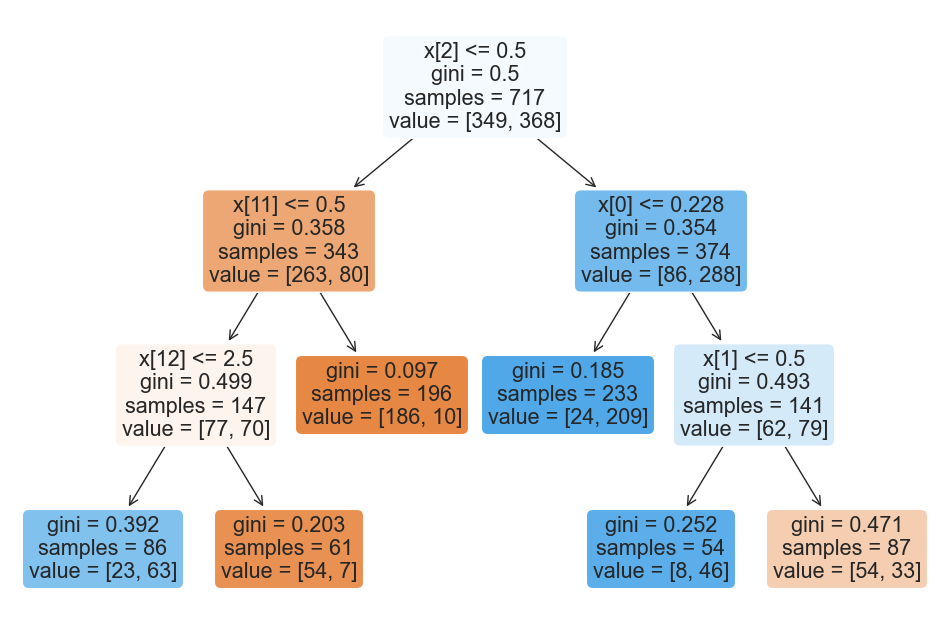

0.8084415584415584


In [75]:
#Choose the point with Low bias(Low training error) and Low variance(Low test error) i.e. alpha=0.01.

dst = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
dst.fit(X_train,Y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(dst,rounded=True,filled=True)
plt.show()

print(accuracy_score(Y_test,dst.predict(X_test)))

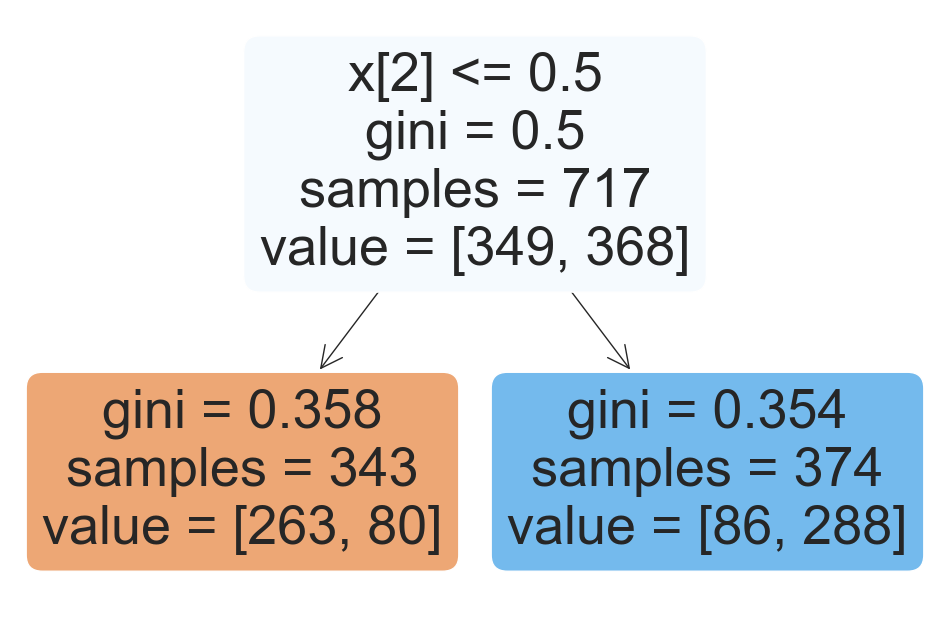

0.7402597402597403


In [76]:
dst = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.12)
dst.fit(X_train,Y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(dst,rounded=True,filled=True)
plt.show()

print(accuracy_score(Y_test,dst.predict(X_test)))

In [77]:
dst = tree.DecisionTreeClassifier(random_state=0)
dst.fit(X_train,Y_train)
#Y_train_pred=dst.predict(X_train)
#Y_test_pred=dst.predict(X_test)

DecisionTreeClassifier(random_state=0)

In [78]:
#PRE-PRUNING
grid_param = {"criterion":["gini","entropy"],
              "splitter":["best","random"],     
              "max_depth": range(2,5,1),
              "min_samples_split": range(2, 20,1),
              "min_samples_leaf": range(1, 15,1)
}
grid_search=GridSearchCV(estimator=dst,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 5),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [79]:
#Extract best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


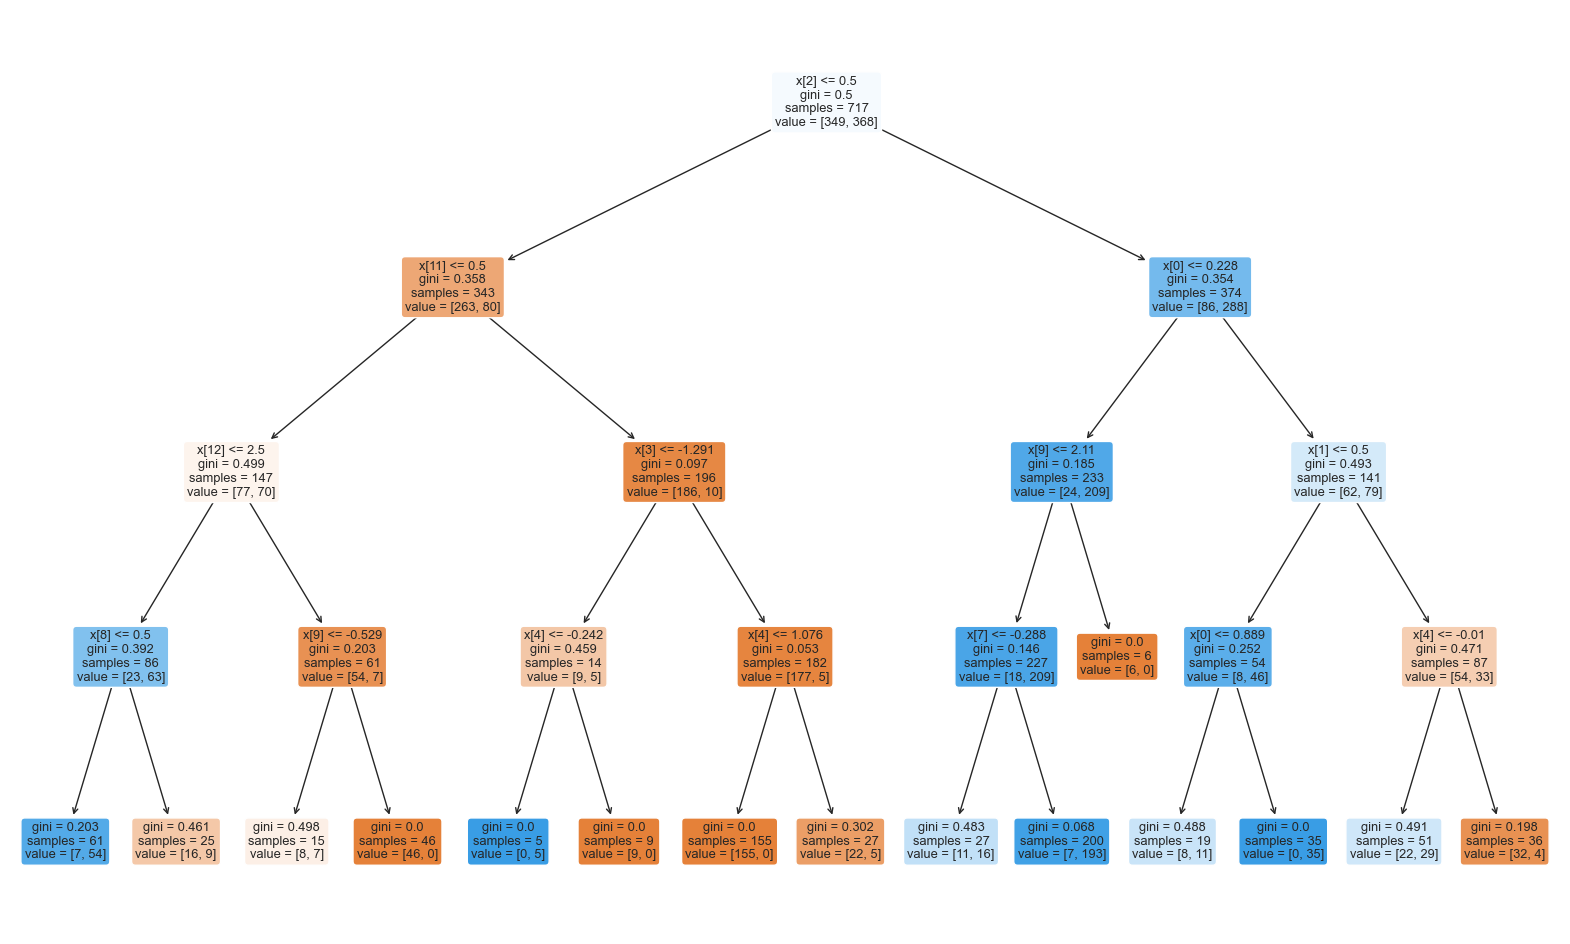

In [80]:
# Create a decision tree classifier with the specified hyperparameters.
dst = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_leaf=4,
    min_samples_split=2,
    splitter="best",
)
dst.fit(X_train,Y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(dst,rounded=True,filled=True)
plt.show()

In [81]:
Y_predicted=dst.predict(X_test)
accuracy_score(Y_test,Y_predicted)

0.827922077922078

**Entropy**

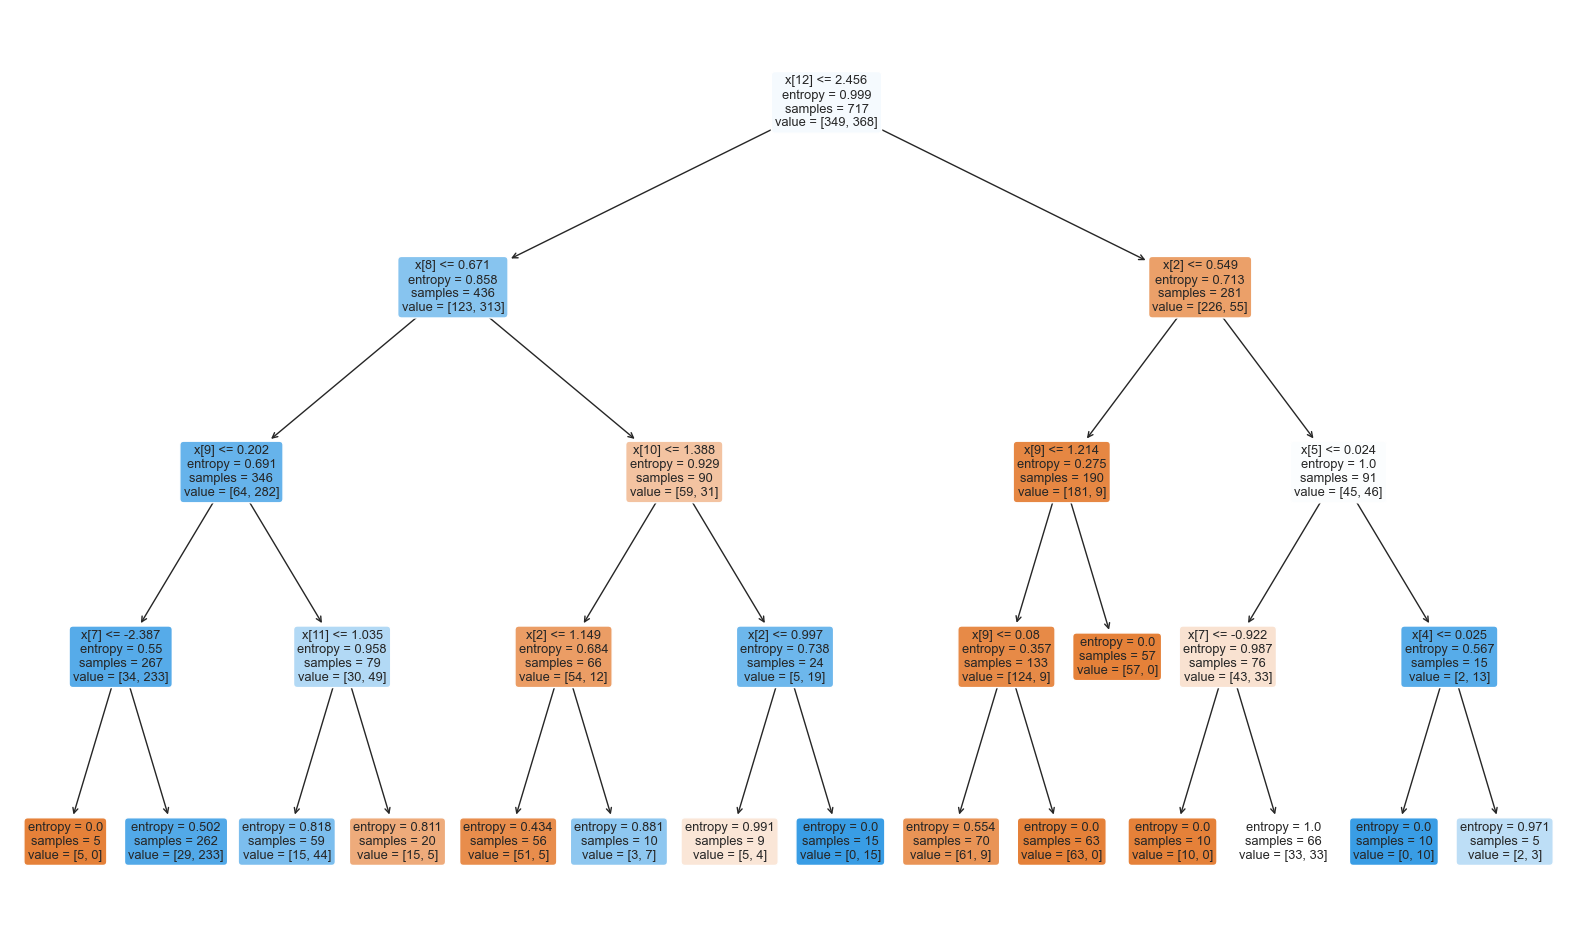

In [82]:
dst = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    min_samples_leaf=4,
    min_samples_split=2,
    splitter="random",
)
dst.fit(X_train,Y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(dst,rounded=True,filled=True)
plt.show()

In [83]:
Y_predicted=dst.predict(X_test)
accuracy_score(Y_test,Y_predicted)

0.775974025974026

**BEST SPLIT**

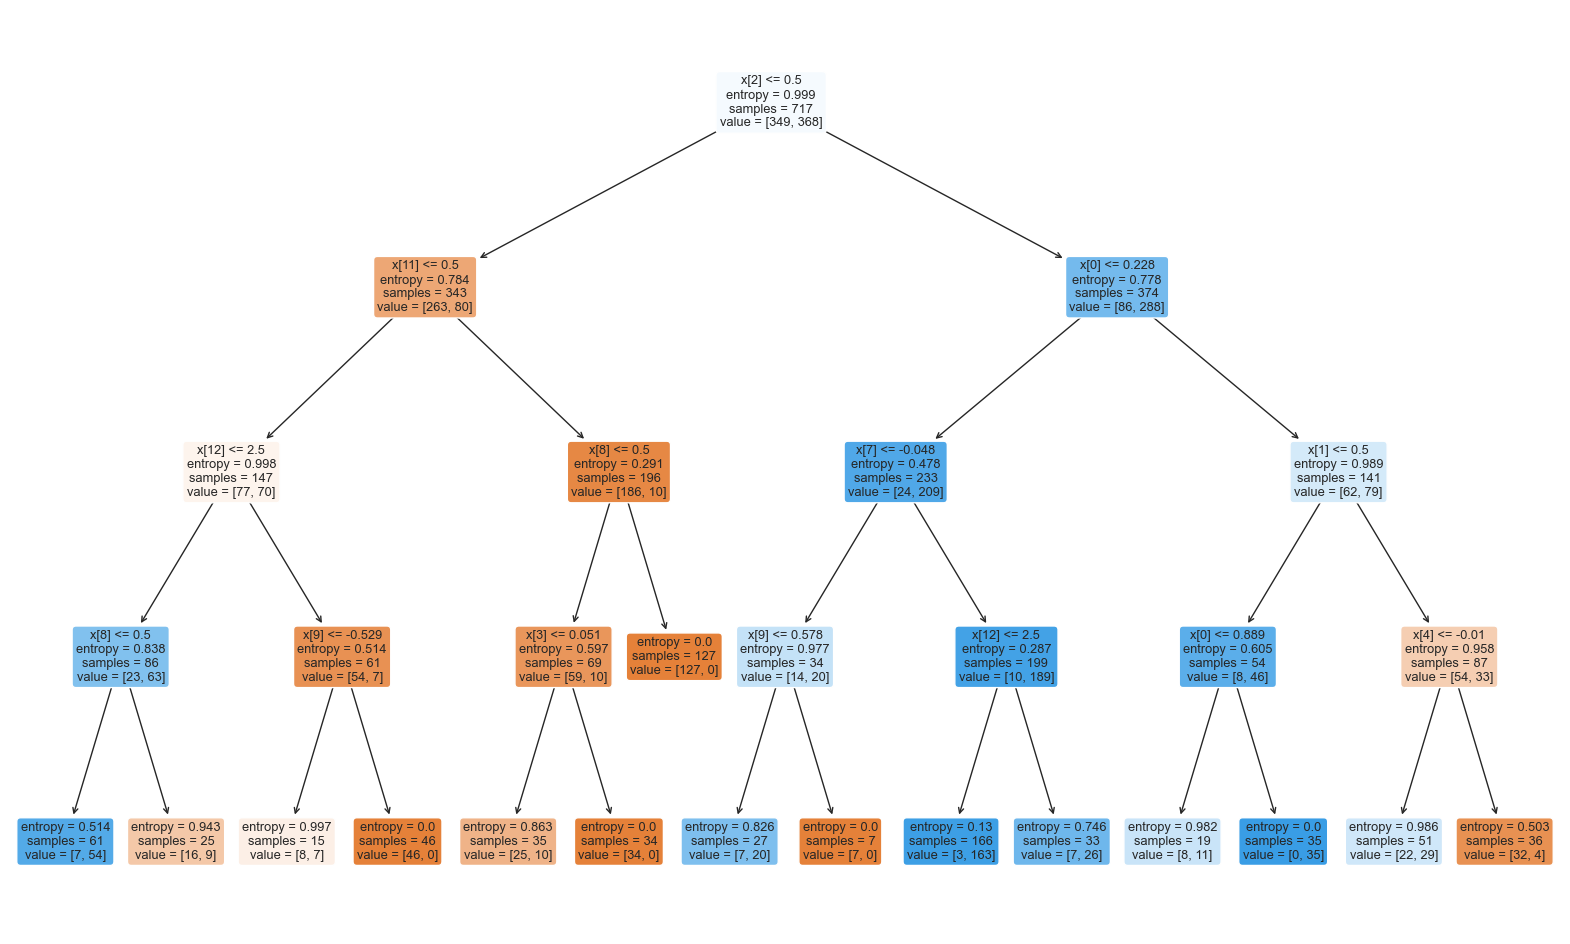

In [84]:
dst = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    min_samples_leaf=4,
    min_samples_split=2,
    splitter="best",
)
dst.fit(X_train,Y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(dst,rounded=True,filled=True)
plt.show()

In [85]:
Y_predicted=dst.predict(X_test)
accuracy_score(Y_test,Y_predicted)

0.8214285714285714

In [86]:
print(confusion_matrix(Y_train,Y_train_pred))


[[349   0]
 [  0 368]]


In [87]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       368

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717



In [88]:
print(confusion_matrix(Y_test,Y_predicted))


[[122  28]
 [ 27 131]]


print(classification_report(Y_test,Y_predicted))

In [89]:
dst = tree.DecisionTreeClassifier(random_state=0)
dst.fit(X_train,Y_train)

#Prediction (Calculation / Learning knowledge from Training Examples)
Y_train_pred = dst.predict(X_train)
#Prediction for new data (Test set)
Y_test_pred = dst.predict(X_test)

In [90]:
print(f'Training accuracy {accuracy_score(Y_train_pred,Y_train)}')
print(f'Test accuracy {accuracy_score(Y_test_pred,Y_test)}')

Training accuracy 1.0
Test accuracy 0.9707792207792207


**Improve the model**

Get the weights of the target classes
1. pass them in our DecisionTreeClassifier model.
2. It handles the imbalance of data.
3. To obtain those weights as given below:

In [91]:
value_counts = dict(heart_data["target"].value_counts())
total_data=len(heart_data)
for key,value in value_counts.items():
  value_counts[key]=value/total_data
class_weights={}
for key,value in value_counts.items():
  class_weights[key]=sum(value_counts.values())-value/sum(value_counts.values())

print(class_weights)

{1: 0.4868292682926829, 0: 0.5131707317073171}


In [92]:
# Create a decision tree classifier with the specified hyperparameters.
dst_10 = DecisionTreeClassifier(max_depth=8, class_weight=class_weights, random_state=0)

# Fit the decision tree classifier to the training data.
dst_10.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight={0: 0.5131707317073171,
                                     1: 0.4868292682926829},
                       max_depth=8, random_state=0)

In [93]:
#Prediction (Calculation / Learning knowledge from Training Examples)
Y_train_pred = dst_10.predict(X_train)
#Prediction for new data (Test set)
Y_test_pred = dst_10.predict(X_test)

In [94]:
print(f'Training accuracy {accuracy_score(Y_train_pred,Y_train)}')
print(f'Test accuracy {accuracy_score(Y_test_pred,Y_test)}')

Training accuracy 0.9944211994421199
Test accuracy 0.961038961038961


**Slightly changed in training & testing accuracy**

In [95]:
print(confusion_matrix(Y_test_pred,Y_test))


[[147   9]
 [  3 149]]


### Using Random Forrest

In [96]:
Rclf = RandomForestClassifier()

In [97]:
Rclf.fit(X_train,Y_train)

RandomForestClassifier()

In [98]:
# accuracy on training data
X_train_prediction = Rclf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = Rclf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy on Test data :  0.9707792207792207


In [99]:
RclfS=Rclf.score(X_test,Y_test)*100
RclfS

97.07792207792207

In [100]:
# Outout will be 0
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Rclf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [101]:
rclf_pred=Rclf.predict(X_test)
rclf_f1_score=f1_score(Y_test,rclf_pred)
print('F1 score for random forrest:', rclf_f1_score)

F1 score for random forrest: 0.9712460063897763


**Using SVM**

In [102]:
svc_model = SVC()

In [103]:
svc_model.fit(X_train,Y_train)

SVC()

In [104]:
SVMS=svc_model.score(X_test,Y_test)*100
SVMS

84.74025974025975

In [105]:
# accuracy on training data
X_train_prediction =svc_model .predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = svc_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.905160390516039
Accuracy on Test data :  0.8474025974025974


In [106]:
svm_pred=svc_model.predict(X_test)
svm_f1_score=f1_score(Y_test,svm_pred)
print('F1 score for decision tree:',svm_f1_score)

F1 score for decision tree: 0.8553846153846154


In [107]:
# Outout will be 0
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


## Final Score

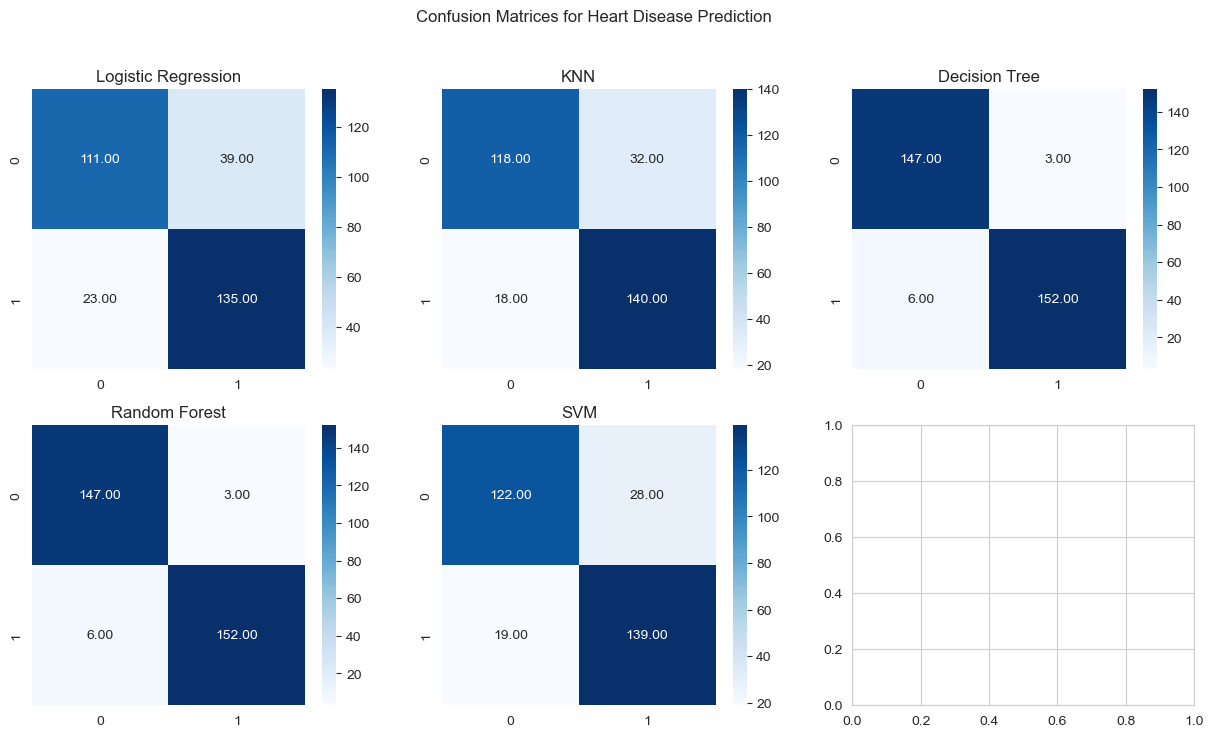

In [108]:
# Create the confusion matrices
cm_lr = confusion_matrix(Y_test, lr_pred)
cm_knn = confusion_matrix(Y_test, knn_pred)
cm_dt = confusion_matrix(Y_test, dst_pred)
cm_rf = confusion_matrix(Y_test, rclf_pred)
cm_svm = confusion_matrix(Y_test, svm_pred)

# Plot the confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.heatmap(cm_lr, ax=axes[0, 0], annot=True, fmt='.2f', cmap='Blues')
axes[0, 0].set_title('Logistic Regression')
sns.heatmap(cm_knn, ax=axes[0, 1], annot=True, fmt='.2f', cmap='Blues')
axes[0, 1].set_title('KNN')
sns.heatmap(cm_dt, ax=axes[0, 2], annot=True, fmt='.2f', cmap='Blues')
axes[0, 2].set_title('Decision Tree')
sns.heatmap(cm_rf, ax=axes[1, 0], annot=True, fmt='.2f', cmap='Blues')
axes[1, 0].set_title('Random Forest')
sns.heatmap(cm_svm, ax=axes[1, 1], annot=True, fmt='.2f', cmap='Blues')
axes[1, 1].set_title('SVM')

plt.suptitle('Confusion Matrices for Heart Disease Prediction')
plt.show()

In [109]:
scores = [LS,KNNS,DCTS,RclfS,SVMS]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forrest","SVM"]  

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 79.87012987012987 %
The accuracy score achieved using K-Nearest Neighbors is: 83.76623376623377 %
The accuracy score achieved using Decision Tree is: 97.07792207792207 %
The accuracy score achieved using Random Forrest is: 97.07792207792207 %
The accuracy score achieved using SVM is: 84.74025974025975 %


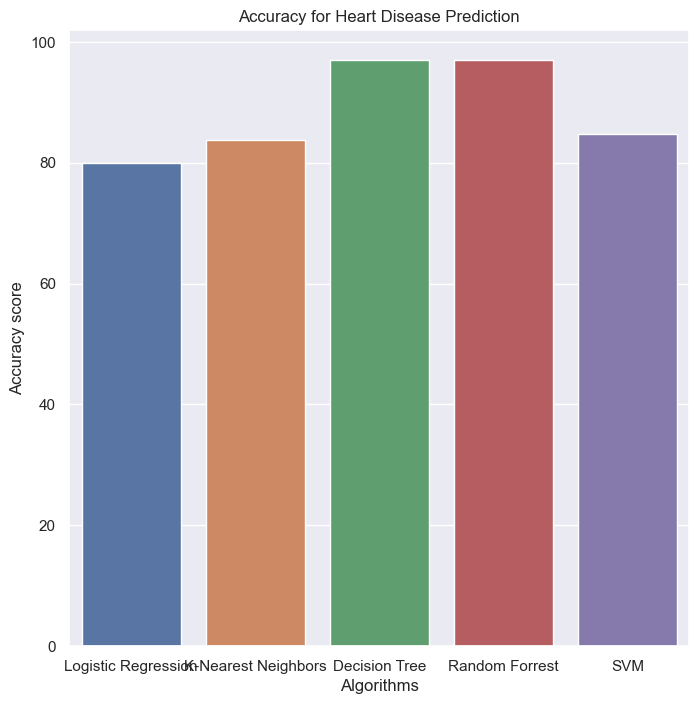

In [110]:
sns.set(rc={'figure.figsize': (8,8)})
plt.title('Accuracy for Heart Disease Prediction')

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)
plt.show()

## We observe that, we can achieve the best accuracy of 97.08% by using  Random Forrest & Decision Tree

In [111]:
f1_scores = [lr_f1_score,knn_f1_score,dst_f1_score,rclf_f1_score,svm_f1_score]

for i in range(len(algorithms)):
    print("The f1 score achieved using "+algorithms[i]+" is: "+str(f1_scores[i]*100)+" %")

The f1 score achieved using Logistic Regression is: 81.32530120481927 %
The f1 score achieved using K-Nearest Neighbors is: 84.84848484848484 %
The f1 score achieved using Decision Tree is: 97.12460063897763 %
The f1 score achieved using Random Forrest is: 97.12460063897763 %
The f1 score achieved using SVM is: 85.53846153846155 %


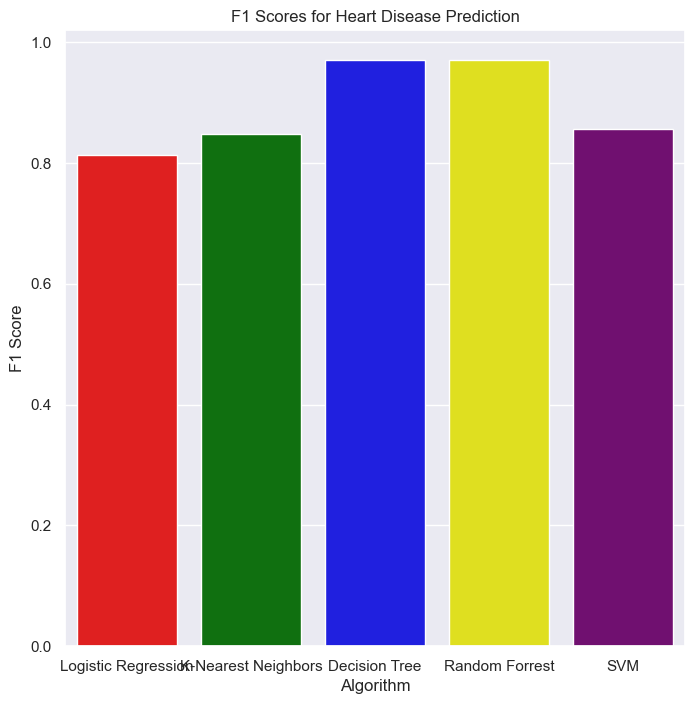

In [112]:
sns.set(rc={'figure.figsize': (8,8)})
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Heart Disease Prediction')
custom_palette = ['red', 'green', 'blue', 'yellow', 'purple']
sns.barplot(x=algorithms,y=f1_scores,palette=custom_palette)

plt.show()

In [113]:
from sklearn.metrics import recall_score, precision_score
lr_recall = recall_score(Y_test, lr_pred)
lr_precision = precision_score(Y_test, lr_pred)

knn_recall = recall_score(Y_test, knn_pred)
knn_precision = precision_score(Y_test, knn_pred)

dt_recall = recall_score(Y_test, dst_pred)
dt_precision = precision_score(Y_test, dst_pred)

rf_recall = recall_score(Y_test, rclf_pred)
rf_precision = precision_score(Y_test, rclf_pred)

svm_recall = recall_score(Y_test, svm_pred)
svm_precision = precision_score(Y_test, svm_pred)

# Print the recall and precision scores
print('Logistic Regression:')
print('Recall:', lr_recall)
print('Precision:', lr_precision)

print('KNN:')
print('Recall:', knn_recall)
print('Precision:', knn_precision)

print('Decision Tree:')
print('Recall:', dt_recall)
print('Precision:', dt_precision)

print('Random Forest:')
print('Recall:', rf_recall)
print('Precision:', rf_precision)

print('SVM:')
print('Recall:', svm_recall)
print('Precision:', svm_precision)
print('\n')

# Create a list of the recall and precision scores
recall_scores = [lr_recall, knn_recall, dt_recall, rf_recall, svm_recall]
precision_scores = [lr_precision, knn_precision, dt_precision, rf_precision, svm_precision]

# Create a dictionary of the recall and precision scores
results = {'Algorithm': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM'],
           'Recall': recall_scores,
           'Precision': precision_scores}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(results)

# Set the border colors
df.style.set_table_styles([
    dict(selector='th', props=[('border-bottom', '1px solid orange')]),
    dict(selector='tr:hover', props=[('background-color', 'lightgray')])
])

# Print the DataFrame to the console
print(df.to_string())

Logistic Regression:
Recall: 0.8544303797468354
Precision: 0.7758620689655172
KNN:
Recall: 0.8860759493670886
Precision: 0.813953488372093
Decision Tree:
Recall: 0.9620253164556962
Precision: 0.9806451612903225
Random Forest:
Recall: 0.9620253164556962
Precision: 0.9806451612903225
SVM:
Recall: 0.879746835443038
Precision: 0.8323353293413174


             Algorithm    Recall  Precision
0  Logistic Regression  0.854430   0.775862
1                  KNN  0.886076   0.813953
2        Decision Tree  0.962025   0.980645
3        Random Forest  0.962025   0.980645
4                  SVM  0.879747   0.832335


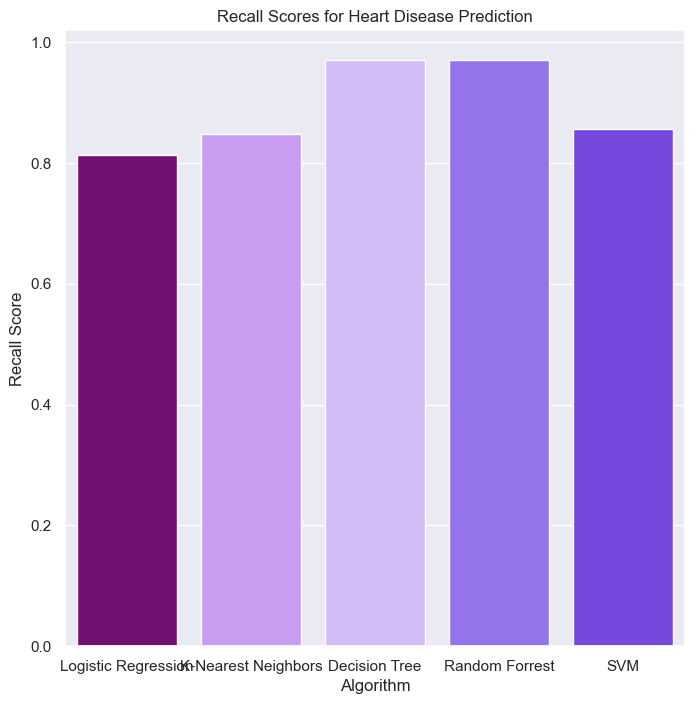

In [114]:
recall_scores = [lr_recall,knn_recall,dt_recall,rf_recall,svm_recall]
sns.set(rc={'figure.figsize': (8,8)})
plt.xlabel('Algorithm')
plt.ylabel('Recall Score')
plt.title('Recall Scores for Heart Disease Prediction')
purple_palette = ["purple", "#C68FFF", "#D2B4FF", "#8C5FFF", "#6B30F7"]
sns.barplot(x=algorithms,y=f1_scores,palette=purple_palette)
plt.show()

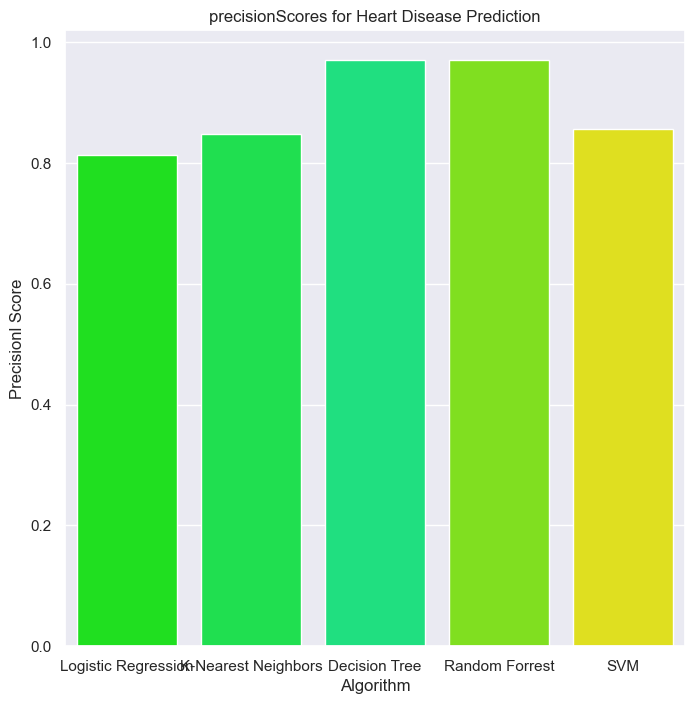

In [115]:
recall_scores = [lr_precision,knn_precision,dt_precision,rf_precision,svm_precision]
sns.set(rc={'figure.figsize': (8,8)})
plt.xlabel('Algorithm')
plt.ylabel('Precisionl Score')
plt.title('precisionScores for Heart Disease Prediction')
green_palette = ["#00FF00", "#00FF40", "#00FF80", "#80FF00", "#FFFF00"]
sns.barplot(x=algorithms,y=f1_scores,palette=green_palette)
plt.show()

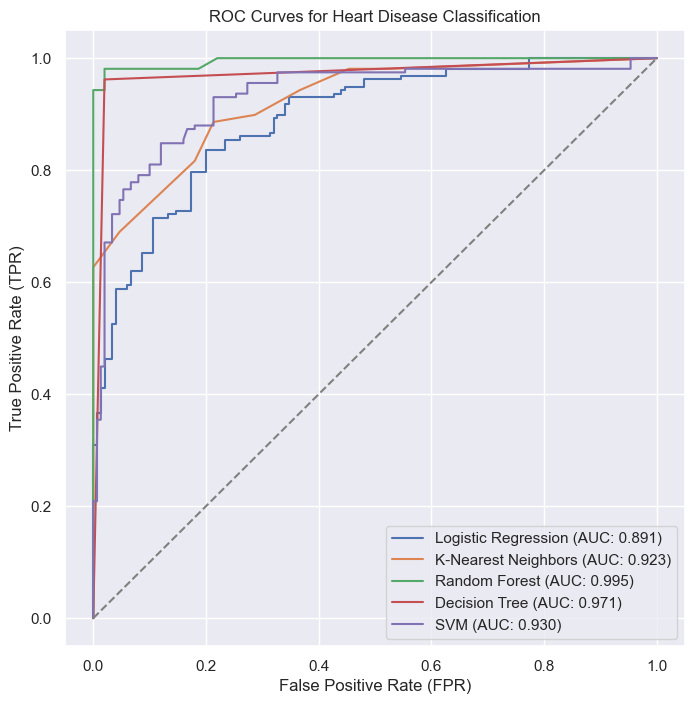

In [116]:
# Create a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=9),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": tree.DecisionTreeClassifier(random_state=0),
    "SVM": SVC(probability=True)

}

# Train the models
for model_name, model in models.items():
    model.fit(X_train, Y_train)

# Generate ROC curves for the models
for model_name, model in models.items():
    Y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
    auc = roc_auc_score(Y_test, Y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC: {auc:.3f})")

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Heart Disease Classification")
plt.legend()
plt.show()

## Ensembles

In [117]:

voting = VotingClassifier(
    estimators=[('logistics_regression', model), ('k_nearset_neighbour', knn), ('decision_tree', dst), ('random_forest', Rclf), ('support_vector_machine', svc_model)],
    voting='hard')

In [118]:
voting.fit(X_train, Y_train)


VotingClassifier(estimators=[('logistics_regression', SVC(probability=True)),
                             ('k_nearset_neighbour',
                              KNeighborsClassifier(n_neighbors=9)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=0)),
                             ('random_forest', RandomForestClassifier()),
                             ('support_vector_machine', SVC())])

In [119]:
for clf in (model,knn,dst,Rclf, svc_model, voting):
    clf.fit(X_train, Y_train)
    y=Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))


SVC 0.8474025974025974
KNeighborsClassifier 0.8376623376623377
DecisionTreeClassifier 0.9707792207792207
RandomForestClassifier 0.9707792207792207
SVC 0.8474025974025974
VotingClassifier 0.8831168831168831


In [120]:
vote = VotingClassifier(
    estimators=[ ('decision_tree', dst), ('random_forest', Rclf), ('support_vector_machine', svc_model)],
    voting='hard')

In [121]:
vote.fit(X_train, Y_train)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(random_state=0)),
                             ('random_forest', RandomForestClassifier()),
                             ('support_vector_machine', SVC())])

In [122]:
for clff in (dst,Rclf, svc_model, vote):
    clff.fit(X_train, Y_train)
    Y_pred = clff.predict(X_test)
    print(clff.__class__.__name__, accuracy_score(Y_test, Y_pred))


DecisionTreeClassifier 0.9707792207792207
RandomForestClassifier 0.9707792207792207
SVC 0.8474025974025974
VotingClassifier 0.9707792207792207


In [123]:
Y_pred = voting.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

print("R^2 score:", r2)

R^2 score: 0.5321518987341771
